# Automatic collection and processing of data on the results of the largest federal elections in the Russian Federation for 2004-2020.
## The data processing and analysis part

Website of the Central Election Commission (CEC) for data collection (may not be available from some countries): http://www.vybory.izbirkom.ru/region/izbirkom

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 50)

# Processing of collected data
## All-Russian voting on amendments to the Russian Constitution

Let's look at the data collected about the results of voting on amendments to the Constitution:

In [2]:
# Read the "raw" data, delete the column that contains the index
constitution = pd.read_csv('data/data-raw/constitution_2020_data_raw.csv').drop('Unnamed: 0', axis=1)

In [3]:
constitution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3031 entries, 0 to 3030
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   vote_date              3031 non-null   object
 1   region                 3031 non-null   object
 2   commission_name        3031 non-null   object
 3   voters_number          3031 non-null   int64 
 4   issued_ballots_number  3031 non-null   int64 
 5   turned_ballots_number  3031 non-null   int64 
 6   bad_ballots_number     3031 non-null   int64 
 7   for_votes_number       3031 non-null   int64 
 8   for_votes_percent      3031 non-null   object
 9   against_votes_number   3031 non-null   int64 
 10  against_votes_percent  3031 non-null   object
 11  link                   3031 non-null   object
dtypes: int64(6), object(6)
memory usage: 284.3+ KB


First of all, we see that we have no missing values!

Let's look at the data itself:

In [4]:
constitution.head()

vote_date                region  \
0  \n\t\t\t\t\t\tДата голосования:  01.07.2020  Новгородская область   
1  \n\t\t\t\t\t\tДата голосования:  01.07.2020  Новгородская область   
2  \n\t\t\t\t\t\tДата голосования:  01.07.2020  Новгородская область   
3  \n\t\t\t\t\t\tДата голосования:  01.07.2020  Новгородская область   
4  \n\t\t\t\t\t\tДата голосования:  01.07.2020  Новгородская область   

  commission_name  voters_number  issued_ballots_number  \
0        Батецкая           4659                   3072   
1     Боровичcкая          53450                  23394   
2      Валдайская          20089                  10678   
3     Волотовская           3503                   2339   
4       Демянская          10391                   5101   

   turned_ballots_number  bad_ballots_number  for_votes_number  \
0                   3072                  33              2374   
1                  23388                 239             15627   
2                  10678                 149              7749   
3                   2339                  13              1953   
4                   5101                  47              3953   

  for_votes_percent  against_votes_number against_votes_percent  \
0            77,28%                   665                21,65%   
1            66,82%                  7522                32,16%   
2            72,57%                  2780                26,03%   
3             83,5%                   373                15,95%   
4            77,49%                  1101                21,58%   

                                                link  
0  http://www.vybory.izbirkom.ru/region/izbirkom?...  
1  http://www.vybory.izbirkom.ru/region/izbirkom?...  
2  http://www.vybory.izbirkom.ru/region/izbirkom?...  
3  http://www.vybory.izbirkom.ru/region/izbirkom?...  
4  http://www.vybory.izbirkom.ru/region/izbirkom?...

I need to process a voting date that contains extra characters.

To do this, I use the `split()` function built into `pandas` (more precisely, the method of an object of type `pandas.Series`) to split the string into a list by spaces and take the last element, which will be our date.
I will also use the `to_datetime()` function built into `pandas` to translate the `dd.mm.YYYYY` format string into `datetime` format.

In [5]:
# Method documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html
constitution['vote_date'] = constitution['vote_date'].str.split().str[-1]

# Function documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
# Let's not forget to point out that we have the first two digits in the line are the day
constitution['vote_date'] = pd.to_datetime(constitution['vote_date'], dayfirst=True)

You may also notice that the proportion of votes for and against are presented in `object` format, because the values contain a percent sign `%`, and the comma, not a dot, is used as the separator of the integer and fractional parts. Let's fix it using the `replace()` function built into `pandas`. Let's not forget to refer to the `.str` attribute of the `pandas.Series` format column to use the built-in functions for working with strings:

In [6]:
# Method documentation: https://pandas.pydata.org/docs/reference/api/pandas.Series.replace.html
constitution['for_votes_percent'] = constitution['for_votes_percent'].str.replace('%', '')
constitution['for_votes_percent'] = constitution['for_votes_percent'].str.replace(',', '.')

Now let's convert the proportion of yes votes into floating point number format using the `.astype()` method of the `pandas.Series` object:

In [7]:
# Method documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html
constitution['for_votes_percent'] = constitution['for_votes_percent'].astype(float)

Let's do the same for votes against the amendments:

In [8]:
constitution['against_votes_percent'] = constitution['against_votes_percent'].str.replace('%', '')
constitution['against_votes_percent'] = constitution['against_votes_percent'].str.replace(',', '.')
constitution['against_votes_percent'] = constitution['against_votes_percent'].astype(float)

In [9]:
constitution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3031 entries, 0 to 3030
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   vote_date              3031 non-null   datetime64[ns]
 1   region                 3031 non-null   object        
 2   commission_name        3031 non-null   object        
 3   voters_number          3031 non-null   int64         
 4   issued_ballots_number  3031 non-null   int64         
 5   turned_ballots_number  3031 non-null   int64         
 6   bad_ballots_number     3031 non-null   int64         
 7   for_votes_number       3031 non-null   int64         
 8   for_votes_percent      3031 non-null   float64       
 9   against_votes_number   3031 non-null   int64         
 10  against_votes_percent  3031 non-null   float64       
 11  link                   3031 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory u

In [10]:
constitution.head()

vote_date                region commission_name  voters_number  \
0 2020-07-01  Новгородская область        Батецкая           4659   
1 2020-07-01  Новгородская область     Боровичcкая          53450   
2 2020-07-01  Новгородская область      Валдайская          20089   
3 2020-07-01  Новгородская область     Волотовская           3503   
4 2020-07-01  Новгородская область       Демянская          10391   

   issued_ballots_number  turned_ballots_number  bad_ballots_number  \
0                   3072                   3072                  33   
1                  23394                  23388                 239   
2                  10678                  10678                 149   
3                   2339                   2339                  13   
4                   5101                   5101                  47   

   for_votes_number  for_votes_percent  against_votes_number  \
0              2374              77.28                   665   
1             15627              66.82                  7522   
2              7749              72.57                  2780   
3              1953              83.50                   373   
4              3953              77.49                  1101   

   against_votes_percent                                               link  
0                  21.65  http://www.vybory.izbirkom.ru/region/izbirkom?...  
1                  32.16  http://www.vybory.izbirkom.ru/region/izbirkom?...  
2                  26.03  http://www.vybory.izbirkom.ru/region/izbirkom?...  
3                  15.95  http://www.vybory.izbirkom.ru/region/izbirkom?...  
4                  21.58  http://www.vybory.izbirkom.ru/region/izbirkom?...

Now the data is stored and displayed correctly!

Let's save the processed data:

In [11]:
constitution.to_csv('data/data-clean/constitution_2020_data.csv')

## Russian presidential elections in 2004-2018.
Now let's look at the data collected about Russian presidential elections in 2004, 2008, 2012 and 2018 and process it.

In [12]:
# Read the "raw" data, delete the column that contains the index
presidential_2004 = pd.read_csv('data/data-raw/presidential_2004_data_raw.csv').drop('Unnamed: 0', axis=1)
presidential_2008 = pd.read_csv('data/data-raw/presidential_2008_data_raw.csv').drop('Unnamed: 0', axis=1)
presidential_2012 = pd.read_csv('data/data-raw/presidential_2012_data_raw.csv').drop('Unnamed: 0', axis=1)
presidential_2018 = pd.read_csv('data/data-raw/presidential_2018_data_raw.csv').drop('Unnamed: 0', axis=1)

### Election 2004
Let's look at the data:

In [13]:
presidential_2004.head()

elections_year                 region       commission_name  voters_number  \
0     14.03.2004  Удмуртская Республика            Алнашская           15958   
1     14.03.2004  Удмуртская Республика           Балезинская          28163   
2     14.03.2004  Удмуртская Республика             Вавожская          12191   
3     14.03.2004  Удмуртская Республика            Воткинская          16040   
4     14.03.2004  Удмуртская Республика  Воткинская городская          78550   

   ballots_number_received  issued_ballots_number_early  \
0                    14700                            0   
1                    27604                            0   
2                    11949                            0   
3                    14766                            0   
4                    76827                            0   

   issued_ballots_number_voting_day_incide  \
0                                    11418   
1                                    21234   
2                                     8824   
3                                    11068   
4                                    44037   

   issued_ballots_number_voting_day_outside  ballots_number_extinguished  \
0                                       961                         2321   
1                                      1544                         4826   
2                                       643                         2482   
3                                      1009                         2689   
4                                      1045                        31745   

   ballots_number_portable_boxes  ballots_number_stationary_boxes  \
0                            961                            11413   
1                           1544                            21233   
2                            643                             8824   
3                           1009                            11067   
4                           1045                            44031   

   ballots_number_invalid  ballots_number_valid  \
0                     127                 12247   
1                     196                 22581   
2                      96                  9371   
3                     152                 11924   
4                     473                 44603   

   ballots_number_absentee_received  ballots_number_absentee_issued  \
0                               353                             232   
1                               419                             390   
2                               193                             141   
3                               695                             626   
4                              1380                             558   

   voters_number_voted_on_absentee_ballots  number_absentee_ballots_unused  \
0                                      102                             121   
1                                      319                              29   
2                                       71                              52   
3                                      259                              69   
4                                      461                             822   

   ballots_number_absentee_issued_to_tik_voters  ballots_number_lost  \
0                                             2                    0   
1                                            31                    0   
2                                             7                    0   
3                                             5                    0   
4                                            44                    0   

   ballots_number_not_counted  glazyev_sergey_yurievich_number  \
0                           0                              216   
1                           0                              329   
2                           0                              172   
3                           0                              382   
4                           0                      

We can see that the data about the voting day was counted well, but it is in string format. Let's convert them into `datetime` format, as we did above:

In [14]:
presidential_2004['elections_year'] = pd.to_datetime(presidential_2004['elections_year'], dayfirst=True)

Let's look at the information about the dataset:

In [15]:
presidential_2004.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2784 entries, 0 to 2783
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   elections_year                                2784 non-null   datetime64[ns]
 1   region                                        2784 non-null   object        
 2   commission_name                               2784 non-null   object        
 3   voters_number                                 2784 non-null   int64         
 4   ballots_number_received                       2784 non-null   int64         
 5   issued_ballots_number_early                   2784 non-null   int64         
 6   issued_ballots_number_voting_day_incide       2784 non-null   int64         
 7   issued_ballots_number_voting_day_outside      2784 non-null   int64         
 8   ballots_number_extinguished                   2784 non-null   int64 

We see that we have no missing data, 2784 rows (territorial election commissions — TECs) in total. All data are of the correct type. Let me remind you that information about election results in 6 regions (including Moscow) was not available on the CEC website.

Let's save the processed data set:

In [16]:
presidential_2004.to_csv('data/data-clean/presidential_2004_data.csv')

### Election 2008

Let's look at the data:

In [17]:
presidential_2008.head()

elections_year           region commission_name  voters_number  \
0  \n02.03.2008\n  Камчатский край       Алеутская            554   
1  \n02.03.2008\n  Камчатский край     Быстринская           2237   
2  \n02.03.2008\n  Камчатский край    Вилючинская           18419   
3  \n02.03.2008\n  Камчатский край      Елизовская          49988   
4  \n02.03.2008\n  Камчатский край     Мильковская           8147   

   ballots_number_received  issued_ballots_number_early  \
0                      545                            4   
1                     2000                          256   
2                    17810                            0   
3                    44965                           28   
4                     8700                           34   

   issued_ballots_number_voting_day_incide  \
0                                      373   
1                                     1285   
2                                    11976   
3                                    29039   
4                                     4617   

   issued_ballots_number_voting_day_outside  ballots_number_extinguished  \
0                                        29                          139   
1                                        69                          390   
2                                       218                         5616   
3                                      1027                        14871   
4                                       245                         3804   

   ballots_number_portable_boxes  ballots_number_stationary_boxes  \
0                             33                              373   
1                            325                             1285   
2                            218                            11971   
3                           1055                            29020   
4                            277                             4575   

   ballots_number_invalid  ballots_number_valid  \
0                       7                   399   
1                      19                  1591   
2                     157                 12032   
3                     422                 29653   
4                      54                  4798   

   ballots_number_absentee_received  ballots_number_absentee_issued  \
0                                30                               4   
1                                46                              25   
2                               315                             228   
3                               330                             235   
4                               110                              53   

   voters_number_voted_on_absentee_ballots  number_absentee_ballots_unused  \
0                                        1                              26   
1                                       18                              21   
2                                      187                              87   
3                                      213                              95   
4                                       34                              57   

   ballots_number_absentee_issued_to_tik_voters  ballots_number_lost  \
0                                             0                    0   
1                                             4                    0   
2                                           324                    0   
3                                            39                    0   
4                                            11                    0   

   ballots_number_not_counted  number_absentee_ballots_lost  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   number_absentee_ballots_not_taken  bogdanov_andrey_vladimirovich_n

We see that the voting date was read with extra characters. Let's process it: we will use the `.strip()` method of the `pandas.Series` object to remove whitespace characters (which includes `\n`) from both sides of the string. We will also immediately convert the result to `datetime` format:

In [18]:
presidential_2008['elections_year'] = pd.to_datetime(presidential_2008['elections_year'].str.strip(), dayfirst=True)

Let's look at some basic information about the dataset:

In [19]:
presidential_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Data columns (total 31 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   elections_year                                3112 non-null   datetime64[ns]
 1   region                                        3112 non-null   object        
 2   commission_name                               3112 non-null   object        
 3   voters_number                                 3112 non-null   int64         
 4   ballots_number_received                       3112 non-null   int64         
 5   issued_ballots_number_early                   3112 non-null   int64         
 6   issued_ballots_number_voting_day_incide       3112 non-null   int64         
 7   issued_ballots_number_voting_day_outside      3112 non-null   int64         
 8   ballots_number_extinguished                   3112 non-null   int64 

We see that for 2008 we have 3112 rows (TECs) and again no missing data. 

Let's save the processed data array:

In [218]:
presidential_2008.to_csv('data/data-clean/presidential_2008_data.csv')

### Election 2012

Let's look at the data:

In [20]:
presidential_2012.head()

elections_year               region  \
0  <td>\n\t\t\t\t\t\tДата голосования:  04.03.201...  Челябинская область   
1  <td>\n\t\t\t\t\t\tДата голосования:  04.03.201...  Челябинская область   
2  <td>\n\t\t\t\t\t\tДата голосования:  04.03.201...  Челябинская область   
3  <td>\n\t\t\t\t\t\tДата голосования:  04.03.201...  Челябинская область   
4  <td>\n\t\t\t\t\t\tДата голосования:  04.03.201...  Челябинская область   

      commission_name  voters_number  ballots_number_received  \
0          Агаповская          27910                    26240   
1          Аргаяшская          34064                    31190   
2  Ашинская городская          53581                    51900   
3          Брединская          22723                    22250   
4          Варненская          22407                    21220   

   issued_ballots_number_early  issued_ballots_number_voting_day_incide  \
0                            0                                    16407   
1                            0                                    19208   
2                            0                                    28209   
3                            0                                    12535   
4                            0                                    13537   

   issued_ballots_number_voting_day_outside  ballots_number_extinguished  \
0                                      2464                         7369   
1                                      1386                        10595   
2                                      6329                        17362   
3                                      1075                         8640   
4                                      1498                         6185   

   ballots_number_portable_boxes  ballots_number_stationary_boxes  \
0                           2464                            16329   
1                           1386                            19208   
2                           6329                            28200   
3                           1075                            12534   
4                           1498                            13536   

   ballots_number_invalid  ballots_number_valid  \
0                     254                 18539   
1                     264                 20330   
2                     473                 34056   
3                     139                 13470   
4                     178                 14856   

   ballots_number_absentee_received  \
0                               324   
1                              1215   
2                               358   
3                               376   
4                               396   

   ballots_number_absentee_issued_at_polling_station  \
0                                                318   
1                                               1105   
2                                                245   
3                                                350   
4                                                375   

   voters_number_voted_on_absentee_ballots  number_absentee_ballots_unused  \
0                                      156                               6   
1                                      568                             110   
2                                      156                             113   
3                                      115                              26   
4                                      161                              21   

   ballots_number_absentee_issued_to_tik_voters  number_absentee_ballots_lost  \
0                                            26                             0   
1                                            35                             0   
2                                           103                             0   
3                                            14                             0   
4                                            19                             0   

   ballots_number_lost  ba

We see that with the voting date, in addition to the whitespace characters, the entire tag is also preserved. Since this format will be identical for the entire 2012 dataset, we can simply make a line slice with the desired range:

In [22]:
presidential_2012['elections_year'].str[30:-5]

0       04.03.2012
1       04.03.2012
2       04.03.2012
3       04.03.2012
4       04.03.2012
           ...    
3124    04.03.2012
3125    04.03.2012
3126    04.03.2012
3127    04.03.2012
3128    04.03.2012
Name: elections_year, Length: 3129, dtype: object

I will also transform the voting date into `datetime` format:

In [23]:
presidential_2012['elections_year'] = pd.to_datetime(presidential_2012['elections_year'].str[30:-5], dayfirst=True)

Let's look at some general information about the dataset:

In [24]:
presidential_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   elections_year                                     3129 non-null   datetime64[ns]
 1   region                                             3129 non-null   object        
 2   commission_name                                    3129 non-null   object        
 3   voters_number                                      3129 non-null   int64         
 4   ballots_number_received                            3129 non-null   int64         
 5   issued_ballots_number_early                        3129 non-null   int64         
 6   issued_ballots_number_voting_day_incide            3129 non-null   int64         
 7   issued_ballots_number_voting_day_outside           3129 non-null   int64         
 8   ballots_number_ext

We see that we have 3129 rows (TECs) and again no missing data. All data are in the correct format, so we can save this dataset: 

In [25]:
presidential_2012.to_csv('data/data-clean/presidential_2012_data.csv')

### Election 2018

Let's look at the data:

In [26]:
presidential_2018.head()

elections_year                   region  \
0  \n\t\t\t\t\t\tДата голосования:  18.03.2018        город Севастополь   
1  \n\t\t\t\t\t\tДата голосования:  18.03.2018        город Севастополь   
2  \n\t\t\t\t\t\tДата голосования:  18.03.2018        город Севастополь   
3  \n\t\t\t\t\t\tДата голосования:  18.03.2018        город Севастополь   
4  \n\t\t\t\t\t\tДата голосования:  18.03.2018  Калининградская область   

   commission_name  voters_number  ballots_number_received  \
0     Балаклавская          40790                    33540   
1      Гагаринская         115686                    97629   
2        Ленинская          91688                    78650   
3      Нахимовская          90846                    78471   
4  Багратионовская          24281                    23000   

   issued_ballots_number_early  issued_ballots_number_voting_day_incide  \
0                            0                                    27816   
1                            0                                    78894   
2                          208                                    63876   
3                          425                                    63283   
4                            0                                    13430   

   issued_ballots_number_voting_day_outside  ballots_number_extinguished  \
0                                      1160                         4563   
1                                      2090                        16645   
2                                      2209                        12354   
3                                      2215                        12548   
4                                       784                         8786   

   ballots_number_portable_boxes  ballots_number_stationary_boxes  \
0                           1160                            27813   
1                           2089                            78833   
2                           2414                            63871   
3                           2616                            63260   
4                            784                            13429   

   ballots_number_invalid  ballots_number_valid  ballots_number_lost  \
0                     268                 28705                    1   
1                     646                 80276                    0   
2                     570                 65715                    4   
3                     556                 65320                    0   
4                     187                 14026                    0   

   ballots_number_not_counted  baburin_sergey_nikolaevich_number  \
0                           0                                 61   
1                           0                                194   
2                           1                                180   
3                           0                                141   
4                           0                                 69   

   baburin_sergey_nikolaevich_percent  grudinin_pavel_nikolaevich_number  \
0                                0.21                                879   
1                                0.24                               3140   
2                                0.27                               2495   
3                                0.21                               2184   
4                                0.49                               1160   

   grudinin_pavel_nikolaevich_percent  zhirinovsky_vladimir_volfovich_number  \
0                                3.03                                    794   
1                                3.88                                   2176   
2                                3.76                                   1918   
3                                3.32                                   2100   
4                                8.16                                    923   

   zhirinovsky_vladimir_volfovich_percent  \
0                                    2.74   
1              

Let's process the voting date in the same way as with the data on voting on constitutional amendments. Apply `.split()` method of `pandas.Series` object and take the last element of the list:

In [27]:
presidential_2018['elections_year'] = pd.to_datetime(presidential_2018['elections_year'].str.split().str[-1], dayfirst=True)

Let's look at some basic information about the data:

In [28]:
presidential_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3176 entries, 0 to 3175
Data columns (total 32 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   elections_year                            3176 non-null   datetime64[ns]
 1   region                                    3176 non-null   object        
 2   commission_name                           3176 non-null   object        
 3   voters_number                             3176 non-null   int64         
 4   ballots_number_received                   3176 non-null   int64         
 5   issued_ballots_number_early               3176 non-null   int64         
 6   issued_ballots_number_voting_day_incide   3176 non-null   int64         
 7   issued_ballots_number_voting_day_outside  3176 non-null   int64         
 8   ballots_number_extinguished               3176 non-null   int64         
 9   ballots_number_portable_boxes 

We see that we have 3176 rows (TECs) and no missing data. Let's save the resulting dataset:

In [29]:
presidential_2018.to_csv('data/data-clean/presidential_2018_data.csv')

### Combining data on presidential elections

In order to bring the resulting dataset closer to the real research, I propose to combine the data to obtain panel data with temporal variability (4 periods — voting) and spatial variability (different regions of the Russian Federation and foreign commissions). 

Since each election presents its own unique set of candidates, I propose to divide all votes into two categories: for the incumbent (representative of the incumbent government) and opposition (representatives of opposition (parliamentary and non-parliamentary) parties). Such a division is quite consistent with the possible design of an electoral survey.

I will create four new columns for each data set: 
1. `opposition_number`.
2. `opposition_percent`.
3. `incumbent_number`
4. `incumbent_percent`.

And I will also remove the columns that formed them (votes for individual candidates) so that the datasets can then be concatenated:

In [30]:
# Election 2004
presidential_2004['opposition_number'] = (presidential_2004['glazyev_sergey_yurievich_number'] + 
                                          presidential_2004['malyshkin_oleg_alexandrovich_number'] + 
                                          presidential_2004['mironov_sergey_mikhailovich_number'] + 
                                          presidential_2004['khakamada_irina_mutsuovna_number'] + 
                                          presidential_2004['kharitonov_nikolai_mikhailovich_number'])

presidential_2004['opposition_percent'] = (presidential_2004['glazyev_sergey_yurievich_percent'] + 
                                           presidential_2004['malyshkin_oleg_alexandrovich_percent'] + 
                                           presidential_2004['mironov_sergey_mikhailovich_percent'] + 
                                           presidential_2004['khakamada_irina_mutsuovna_percent'] + 
                                           presidential_2004['kharitonov_nikolai_mikhailovich_percent'])

# I use the .copy() method to avoid creating a column reference
presidential_2004['incumbent_number'] = presidential_2004['putin_vladimir_vladimirovich_number'].copy()
presidential_2004['incumbent_percent'] = presidential_2004['putin_vladimir_vladimirovich_percent'].copy()

# Election 2008
presidential_2008['opposition_number'] = (presidential_2008['bogdanov_andrey_vladimirovich_number'] + 
                                          presidential_2008['zhirinovsky_vladimir_volfovich_number'] + 
                                          presidential_2008['zyuganov_gennady_andreevich_number'])

presidential_2008['opposition_percent'] = (presidential_2008['bogdanov_andrey_vladimirovich_percent'] + 
                                           presidential_2008['zhirinovsky_vladimir_volfovich_percent'] + 
                                           presidential_2008['zyuganov_gennady_andreevich_percent'])

presidential_2008['incumbent_number'] = presidential_2008['medvedev_dmitry_anatolyevich_number'].copy()
presidential_2008['incumbent_percent'] = presidential_2008['medvedev_dmitry_anatolyevich_percent'].copy()

# Election 2012
presidential_2012['opposition_number'] = (presidential_2012['zhirinovsky_vladimir_volfovich_number'] + 
                                          presidential_2012['zyuganov_gennady_andreevich_number'] + 
                                          presidential_2012['mironov_sergey_mikhailovich_number'] + 
                                          presidential_2012['prokhorov_mikhail_dmitrievich_number'])

presidential_2012['opposition_percent'] = (presidential_2012['zhirinovsky_vladimir_volfovich_percent'] + 
                                           presidential_2012['zyuganov_gennady_andreevich_percent'] + 
                                           presidential_2012['mironov_sergey_mikhailovich_percent'] + 
                                           presidential_2012['prokhorov_mikhail_dmitrievich_percent'])

presidential_2012['incumbent_number'] = presidential_2012['putin_vladimir_vladimirovich_number'].copy()
presidential_2012['incumbent_percent'] = presidential_2012['putin_vladimir_vladimirovich_percent'].copy()

# Election 2018.
presidential_2018['opposition_number'] = (presidential_2018['baburin_sergey_nikolaevich_number'] + 
                                          presidential_2018['grudinin_pavel_nikolaevich_number'] + 
                                          presidential_2018['zhirinovsky_vladimir_volfovich_number'] + 
                                          presidential_2018['sobchak_ksenia_anatolyevna_number'] + 
                                          presidential_2018['suraykin_maxim_alexandrovich_number'] + 
                                          presidential_2018['titov_boris_yurievich_number'] + 
                                          presidential_2018['yavlinsky_grigory_alekseevich_number'])

presidential_2018['opposition_percent'] = (presidential_2018['baburin_sergey_nikolaevich_percent'] + 
                                           presidential_2018['grudinin_pavel_nikolaevich_percent'] + 
                                           presidential_2018['zhirinovsky_vladimir_volfovich_percent'] + 
                                           presidential_2018['sobchak_ksenia_anatolyevna_percent'] + 
                                           presidential_2018['suraykin_maxim_alexandrovich_percent'] + 
                                           presidential_2018['titov_boris_yurievich_percent'] + 
                                           presidential_2018['yavlinsky_grigory_alekseevich_percent'])

presidential_2018['incumbent_number'] = presidential_2018['putin_vladimir_vladimirovich_number'].copy()
presidential_2018['incumbent_percent'] = presidential_2018['putin_vladimir_vladimirovich_percent'].copy()

Now I will remove the columns with votes for specific candidates. If necessary and the research question changes, it is also possible to use the original data individually or, for example, to leave votes only for those candidates who ran in the elections in 2004-2018 more than 1 time (V. Zhirinovsky, V. Putin, etc.).

In [31]:
presidential_2004 = presidential_2004.drop(columns=['glazyev_sergey_yurievich_number',
                                                    'glazyev_sergey_yurievich_percent',
                                                    'malyshkin_oleg_alexandrovich_number',
                                                    'malyshkin_oleg_alexandrovich_percent',
                                                    'mironov_sergey_mikhailovich_number',
                                                    'mironov_sergey_mikhailovich_percent',
                                                    'putin_vladimir_vladimirovich_number',
                                                    'putin_vladimir_vladimirovich_percent',
                                                    'khakamada_irina_mutsuovna_number', 
                                                    'khakamada_irina_mutsuovna_percent',
                                                    'kharitonov_nikolai_mikhailovich_number',
                                                    'kharitonov_nikolai_mikhailovich_percent', 
                                                    'against_all_number',
                                                    'against_all_percent'])

In [32]:
presidential_2008 = presidential_2008.drop(columns=['bogdanov_andrey_vladimirovich_number',
                                                    'bogdanov_andrey_vladimirovich_percent',
                                                    'zhirinovsky_vladimir_volfovich_number',
                                                    'zhirinovsky_vladimir_volfovich_percent',
                                                    'zyuganov_gennady_andreevich_number',
                                                    'zyuganov_gennady_andreevich_percent',
                                                    'medvedev_dmitry_anatolyevich_number',
                                                    'medvedev_dmitry_anatolyevich_percent'])

In [33]:
presidential_2012 = presidential_2012.drop(columns=['zhirinovsky_vladimir_volfovich_number',
                                                    'zhirinovsky_vladimir_volfovich_percent',
                                                    'zyuganov_gennady_andreevich_number',
                                                    'zyuganov_gennady_andreevich_percent',
                                                    'mironov_sergey_mikhailovich_number',
                                                    'mironov_sergey_mikhailovich_percent',
                                                    'prokhorov_mikhail_dmitrievich_number',
                                                    'prokhorov_mikhail_dmitrievich_percent',
                                                    'putin_vladimir_vladimirovich_number',
                                                    'putin_vladimir_vladimirovich_percent'])

In [34]:
presidential_2018= presidential_2018.drop(columns=['baburin_sergey_nikolaevich_number',
                                                    'baburin_sergey_nikolaevich_percent',
                                                    'grudinin_pavel_nikolaevich_number',
                                                    'grudinin_pavel_nikolaevich_percent',
                                                    'zhirinovsky_vladimir_volfovich_number',
                                                    'zhirinovsky_vladimir_volfovich_percent',
                                                    'putin_vladimir_vladimirovich_number',
                                                    'putin_vladimir_vladimirovich_percent',
                                                    'sobchak_ksenia_anatolyevna_number',
                                                    'sobchak_ksenia_anatolyevna_percent',
                                                    'suraykin_maxim_alexandrovich_number',
                                                    'suraykin_maxim_alexandrovich_percent', 
                                                    'titov_boris_yurievich_number',
                                                    'titov_boris_yurievich_percent', 
                                                    'yavlinsky_grigory_alekseevich_number',
                                                    'yavlinsky_grigory_alekseevich_percent'])

Also, to merge, I will exclude columns that do not occur in all datasets and rename some to have the same name in all datasets:

In [35]:
# Delete columns that don't appear in all the data
presidential_2008 = presidential_2008.drop(columns=['number_absentee_ballots_lost', 'number_absentee_ballots_not_taken'])
presidential_2012 = presidential_2012.drop(columns=['number_absentee_ballots_lost'])
# Rename the columns to the same name
presidential_2012 = presidential_2012.rename({'ballots_number_absentee_issued_at_polling_station': 'ballots_number_absentee_issued'}, axis=1)

I also note that the data for 2018 on the CEC side does not include information about absentee voting, which is available for all other years. In order not to lose this valuable information, I will create corresponding columns with `None` values in the 2018 data so that they can be merged with other observations. 

In [36]:
presidential_2018['ballots_number_absentee_issued'] = None
presidential_2018['ballots_number_absentee_issued_to_tik_voters'] = None
presidential_2018['ballots_number_absentee_received'] = None
presidential_2018['number_absentee_ballots_unused'] = None
presidential_2018['voters_number_voted_on_absentee_ballots'] = None

Let's combine (concatenate) the data using the `pandas.concat()` function:

In [37]:
# Function documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
presidential_data_merged = pd.concat([presidential_2004, presidential_2008, presidential_2012, presidential_2018])

Let's save the merged dataset:

In [209]:
presidential_data_merged.to_csv('data/data-clean/presidential_data_merged.csv')

In [38]:
presidential_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12201 entries, 0 to 3175
Data columns (total 25 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   elections_year                                12201 non-null  datetime64[ns]
 1   region                                        12201 non-null  object        
 2   commission_name                               12201 non-null  object        
 3   voters_number                                 12201 non-null  int64         
 4   ballots_number_received                       12201 non-null  int64         
 5   issued_ballots_number_early                   12201 non-null  int64         
 6   issued_ballots_number_voting_day_incide       12201 non-null  int64         
 7   issued_ballots_number_voting_day_outside      12201 non-null  int64         
 8   ballots_number_extinguished                   12201 non-null  int64     

So, we have a set of summary data on presidential elections for 2004-2018. There are no missing values in it, except for the ones I created for 2018, because the CEC did not provide some of the data after this election. We got a total of 12201 rows for 4 periods. 

# Analysis of collected and processed data
## All-Russian voting on amendments to the Russian Constitution

Let us try to analyze the processed data of the results of voting on the amendments and derive meaningful insights from them.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# my personal settings for visualization
sns.set(style='darkgrid', palette='deep')
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['savefig.format'] = 'pdf'

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
# Считаем обработанные данные
constitution = pd.read_csv('data/data-clean/constitution_2020_data.csv').drop('Unnamed: 0', axis=1)

### Descriptive statistics

Let's look at the descriptive statistics of the data:

In [42]:
constitution.describe().T

count          mean           std    min        25%  \
voters_number          3031.0  36024.525569  45376.767716   6.00  10375.000   
issued_ballots_number  3031.0  24485.501485  32858.148296   6.00   7115.000   
turned_ballots_number  3031.0  24452.067634  32675.968293   6.00   7115.000   
bad_ballots_number     3031.0    199.587925    284.869615   0.00     44.000   
for_votes_number       3031.0  19052.223029  24650.431847   6.00   5445.000   
for_votes_percent      3031.0     75.822709     11.945032  15.73     68.275   
against_votes_number   3031.0   5200.256681   9188.324276   0.00   1265.500   
against_votes_percent  3031.0     23.321495     11.865778   0.00     14.385   

                            50%        75%         max  
voters_number          19794.00  45783.500  1051155.00  
issued_ballots_number  14263.00  30416.500   979092.00  
turned_ballots_number  14257.00  30415.000   964438.00  
bad_ballots_number       107.00    249.000     5291.00  
for_votes_number       10946.00  23281.500   601096.00  
for_votes_percent         75.74     84.800      100.00  
against_votes_number    2640.00   6218.500   363341.00  
against_votes_percent     23.27     30.695       83.43

Among the interesting things: we see that we have one TEC, to which more than a million people belong, and which probably also issued almost a million ballots.

Let's look at it:

In [43]:
constitution[constitution['issued_ballots_number'] > 500_000]

vote_date        region  \
2041  2020-01-07  город Москва   

                                     commission_name  voters_number  \
2041  Данные дистанционного электронного голосования        1051155   

      issued_ballots_number  turned_ballots_number  bad_ballots_number  \
2041                 979092                 964438                   1   

      for_votes_number  for_votes_percent  against_votes_number  \
2041            601096              62.33                363341   

      against_votes_percent                                               link  
2041                  37.67  http://www.vybory.izbirkom.ru/region/izbirkom?...

We see that this TEC refers to remote electronic voting (REV or «ДЭГ» in Russian) in Moscow.

There are also very small TECs:

In [45]:
constitution[constitution['voters_number'] < 10]

vote_date                      region commission_name  voters_number  \
520  2020-01-07  Территория за пределами РФ       УИК №8109              6   

     issued_ballots_number  turned_ballots_number  bad_ballots_number  \
520                      6                      6                   0   

     for_votes_number  for_votes_percent  against_votes_number  \
520                 6              100.0                     0   

     against_votes_percent                                               link  
520                    0.0  http://www.vybory.izbirkom.ru/region/izbirkom?...

According to the list of election commissions abroad, this precinct election commission (PEC) is located in Iran. It probably consists of staff of the Russian Embassy or Consulate in this country.

The average proportion of votes for and against the amendment among TECs is 75.82% and 23.32%, respectively. At the same time, their standard deviation is very similar and is about 12. Thus, it can be argued that most of the values (about 68%) in favor of the amendment are in the range of about 64% to 88%, while those against are between 11% and 35%.

It can also be seen that the most «protesting» TEC has 83.43% of votes against the amendments: 

In [50]:
constitution[constitution['against_votes_percent'] > 83.4]

vote_date                      region commission_name  voters_number  \
669  2020-01-07  Территория за пределами РФ       УИК №8331            356   

     issued_ballots_number  turned_ballots_number  bad_ballots_number  \
669                    356                    356                   3   

     for_votes_number  for_votes_percent  against_votes_number  \
669                56              15.73                   297   

     against_votes_percent                                               link  
669                  83.43  http://www.vybory.izbirkom.ru/region/izbirkom?...

It is also located outside the border of the Russian Federation. At the same time, for example, the election commissions with more than 80% of votes against the amendments were only abroad of the Russian Federation: 

In [51]:
constitution[constitution['against_votes_percent'] > 80]

vote_date                      region commission_name  voters_number  \
485  2020-01-07  Территория за пределами РФ       УИК №8061           2228   
555  2020-01-07  Территория за пределами РФ       УИК №8168            204   
611  2020-01-07  Территория за пределами РФ       УИК №8257            235   
668  2020-01-07  Территория за пределами РФ       УИК №8330           2835   
669  2020-01-07  Территория за пределами РФ       УИК №8331            356   

     issued_ballots_number  turned_ballots_number  bad_ballots_number  \
485                   2228                   2225                   4   
555                    201                    201                   0   
611                    235                    235                   0   
668                   2835                   2834                   4   
669                    356                    356                   3   

     for_votes_number  for_votes_percent  against_votes_number  \
485               430              19.33                  1791   
555                40              19.90                   161   
611                39              16.60                   196   
668               505              17.82                  2325   
669                56              15.73                   297   

     against_votes_percent                                               link  
485                  80.49  http://www.vybory.izbirkom.ru/region/izbirkom?...  
555                  80.10  http://www.vybory.izbirkom.ru/region/izbirkom?...  
611                  83.40  http://www.vybory.izbirkom.ru/region/izbirkom?...  
668                  82.04  http://www.vybory.izbirkom.ru/region/izbirkom?...  
669                  83.43  http://www.vybory.izbirkom.ru/region/izbirkom?...

### Visualization

Let's try to visualize the possible relationships that are in the data and look at their distribution.
For example, let's see if there is a relationship between the number of votes (total) and the proportion of votes in favor:

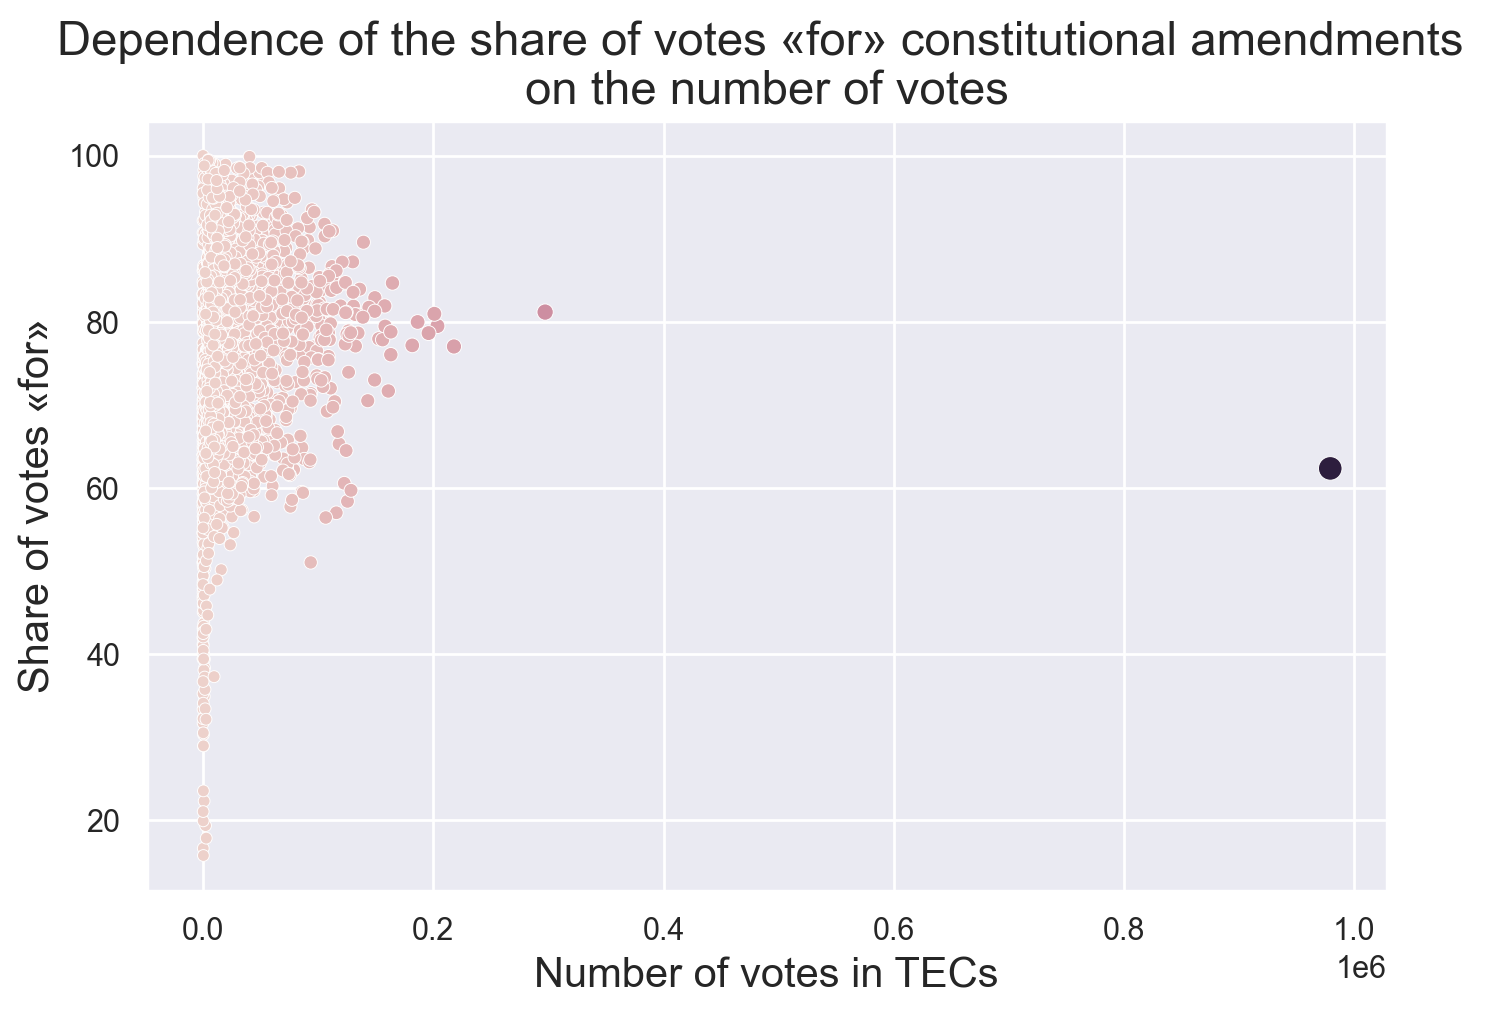

In [6]:
plt.figure(figsize=(8, 5))

sns.scatterplot(data=constitution, 
                x='issued_ballots_number', 
                y='for_votes_percent', 
                hue='issued_ballots_number',
                size='issued_ballots_number',  # let the size of the dots 
                legend=False)                  # will depend on the number of votes

plt.title('Dependence of the share of votes «for» constitutional amendments \non the number of votes', fontsize=17)
plt.xlabel('Number of votes in TECs', fontsize=15)
plt.ylabel('Share of votes «for»', fontsize=15)
plt.show()

We see that we are strongly hindered by the outlier in the form of REV in Moscow. Let's exclude it for visualization, and also try to estimate the correlation using the `regplot()` plot from `seaborn`:

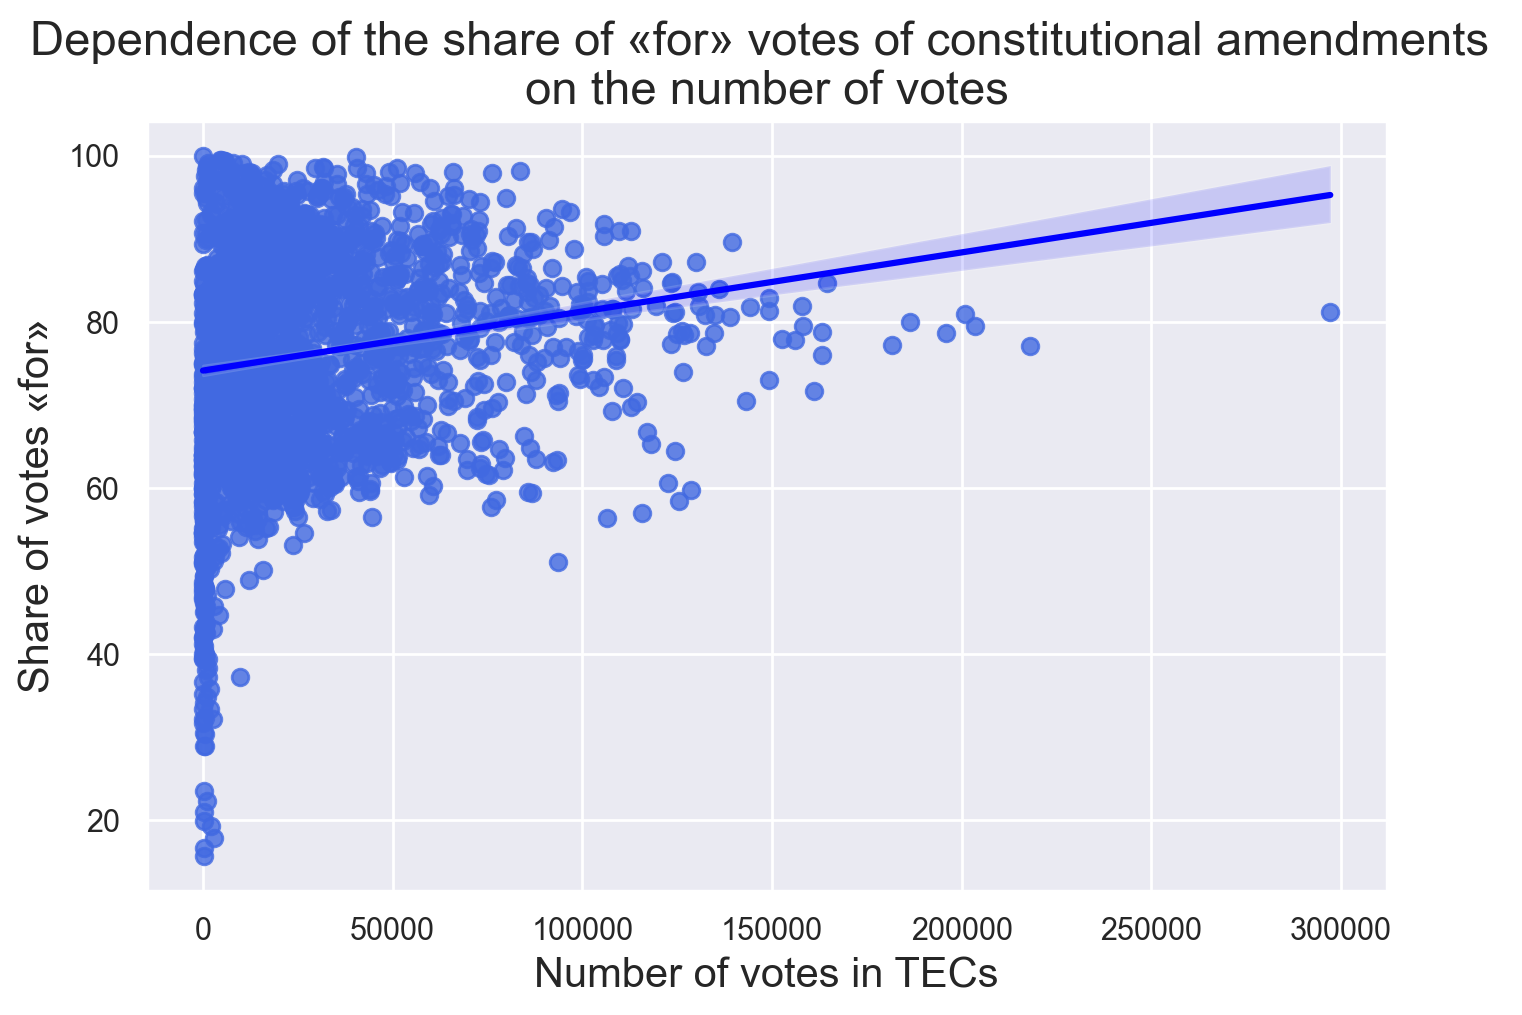

In [7]:
# Plot documentation: https://seaborn.pydata.org/generated/seaborn.regplot.html

plt.figure(figsize=(8, 5))
sns.regplot(x='issued_ballots_number', 
            y='for_votes_percent', 
            data=constitution[constitution['issued_ballots_number'] < 500_000],  # exclude REV in Moscow
            n_boot=1000,  # number of bootstrapped samples for CI construction 
            ci=95,        # 95% CI
            scatter_kws={"color": "royalblue"}, line_kws={"color": "blue"})

plt.title('Dependence of the share of «for» votes of constitutional amendments \non the number of votes', fontsize=17)
plt.xlabel('Number of votes in TECs', fontsize=15)
plt.ylabel('Share of votes «for»', fontsize=15)
plt.show()

We see that we have a positive (but not very strong) relationship between the number of votes and the share of votes «for» amendments. However, it should be noted that with a small number of votes there is a large number of outliers: both with a very large share of votes «for» and with a very small one.

Now let us try to rank the regions by the average share of votes «for». To do this, in addition to visualizing with the `barplot()` graph from `seaborn` I also aggregate the information by region to create an order in which to list the regions in the graph. 

In [9]:
# I will pass the raw data to seaborn, but to make the graph look better,
# the order in which to display the data must be passed to seaborn

# Calculating the average share of "for" votes by region
reg_order = constitution.groupby('region').agg({"for_votes_percent": "mean"}).reset_index()
# Sort the data in descending order
reg_order = reg_order.sort_values('for_votes_percent', ascending=False)['region']

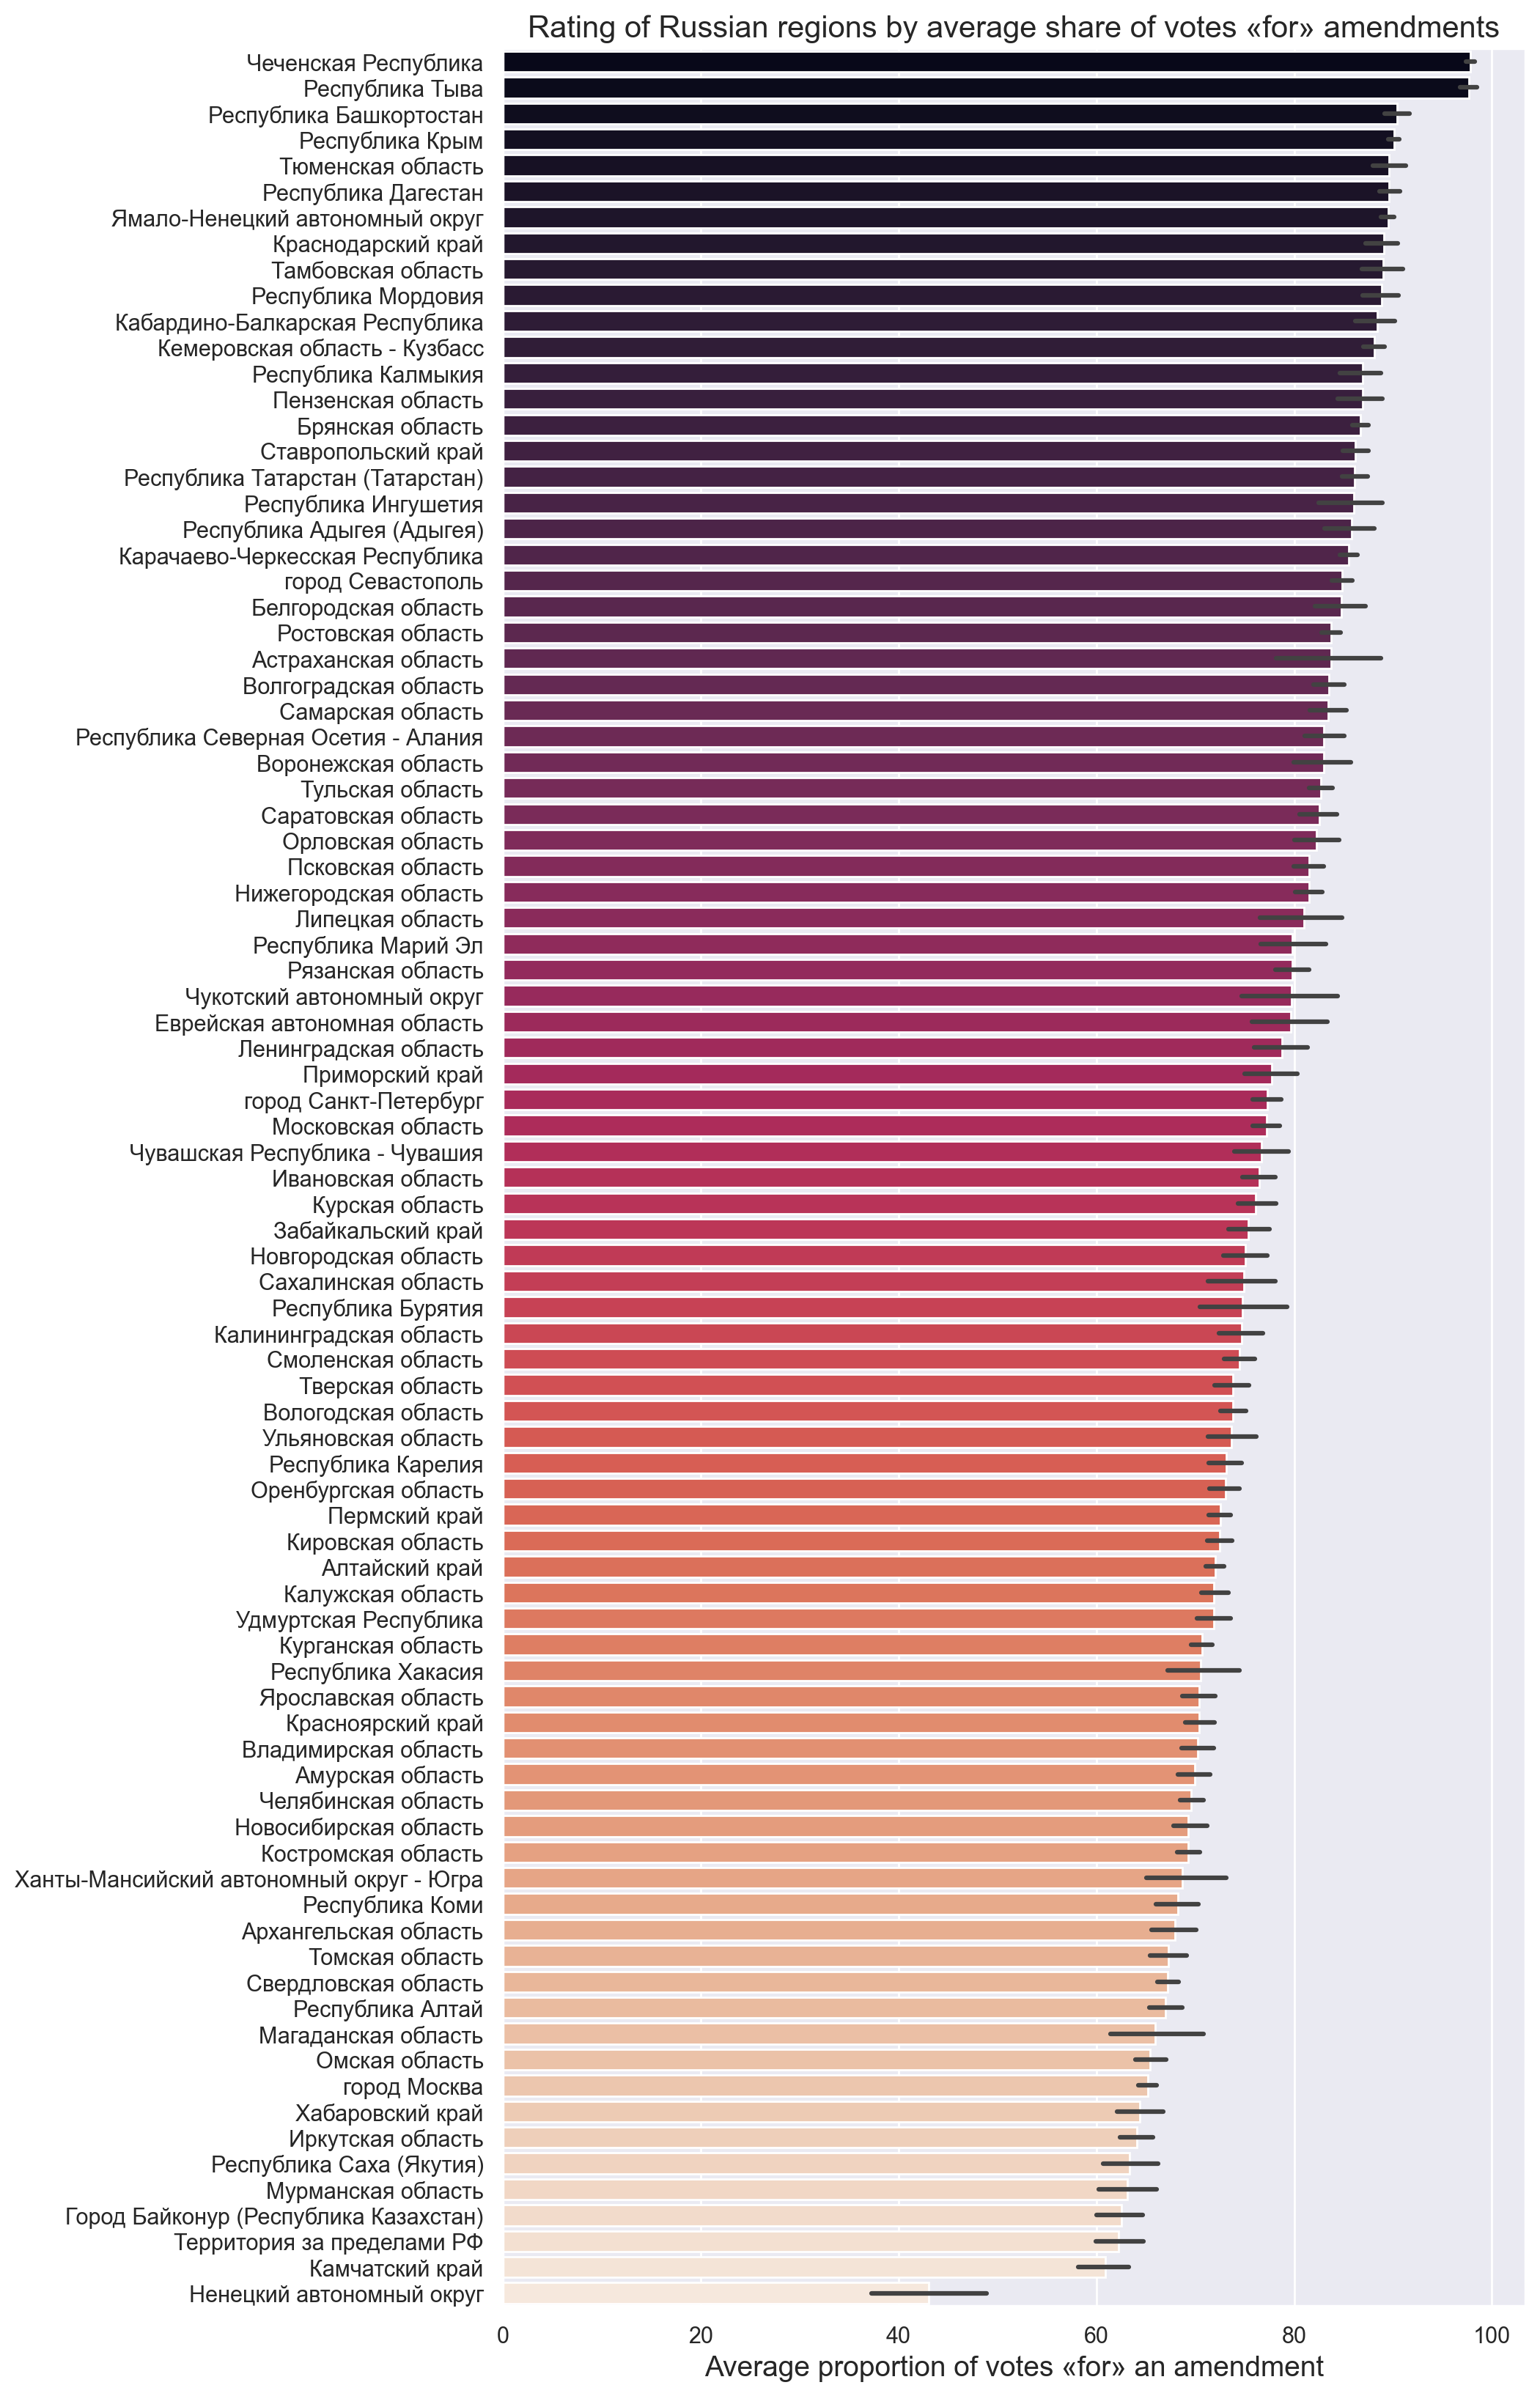

In [10]:
plt.figure(figsize=(9, 20))
sns.barplot(data=constitution, 
            x='for_votes_percent', 
            y='region', 
            hue='region', 
            palette='rocket',
            order=reg_order,
            hue_order=reg_order,
            legend=False)

plt.title('Rating of Russian regions by average share of votes «for» amendments', fontsize=15)
plt.xlabel('Average proportion of votes «for» an amendment', fontsize=14)
plt.ylabel('', fontsize=14)
plt.show()

We see that the top regions in terms of the average share of «for» votes are the Chechen Republic and the Republic of Tyva. On the reverse side of the top is the Nenets Autonomous Okrug, the only region that has an average share of «for» votes less than 50% even taking into account the confidence interval. It can also be seen that the city of Baikonur is a separate election commission, rather than a category of foreign regions.

Let's try to make an interactive visualization using `plotly`: 

In [11]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [12]:
# Docs: https://plotly.com/python/line-and-scatter/
# As before, I will remove the outlier in the form of REV in Moscow
fig = px.scatter(constitution[constitution['issued_ballots_number'] < 500_000], 
                 x="issued_ballots_number", 
                 y="for_votes_percent", 
                 size='bad_ballots_number', 
                 hover_data=['region', 'commission_name'],
                 marginal_x="histogram", 
                 marginal_y="histogram",
                 width = 1200, 
                 height = 600)

fig.update_layout(title='Relationship between the number of votes and the «for» vote share of an amendment')
fig.update_layout(xaxis_title='Number of votes', yaxis_title='Share of «for» votes')
fig.show()

The previous scatter diagram was supplemented by a variation in the size of the points depending on the number of spoiled ballots. Unexpectedly, we see TECs with a large share of «for» votes among the leaders in this indicator (perhaps this indicates potential vote fraud in these commissions).

One can also notice in the histograms that the number of votes in TECs has an almost perfect lognormal distribution, sloping to the left. This means that there are few TECs in Russia with a large number of votes (I think, with a large number of voters too): on average, up to 15 thousand votes per TEC.

The «for»vote share distribution has a close to normal distribution, but it has two small peaks and a long «tail» towards fewer votes.

Additionally, we construct «box-and-whiskers plot» for the proportion of «for» and «against» votes:

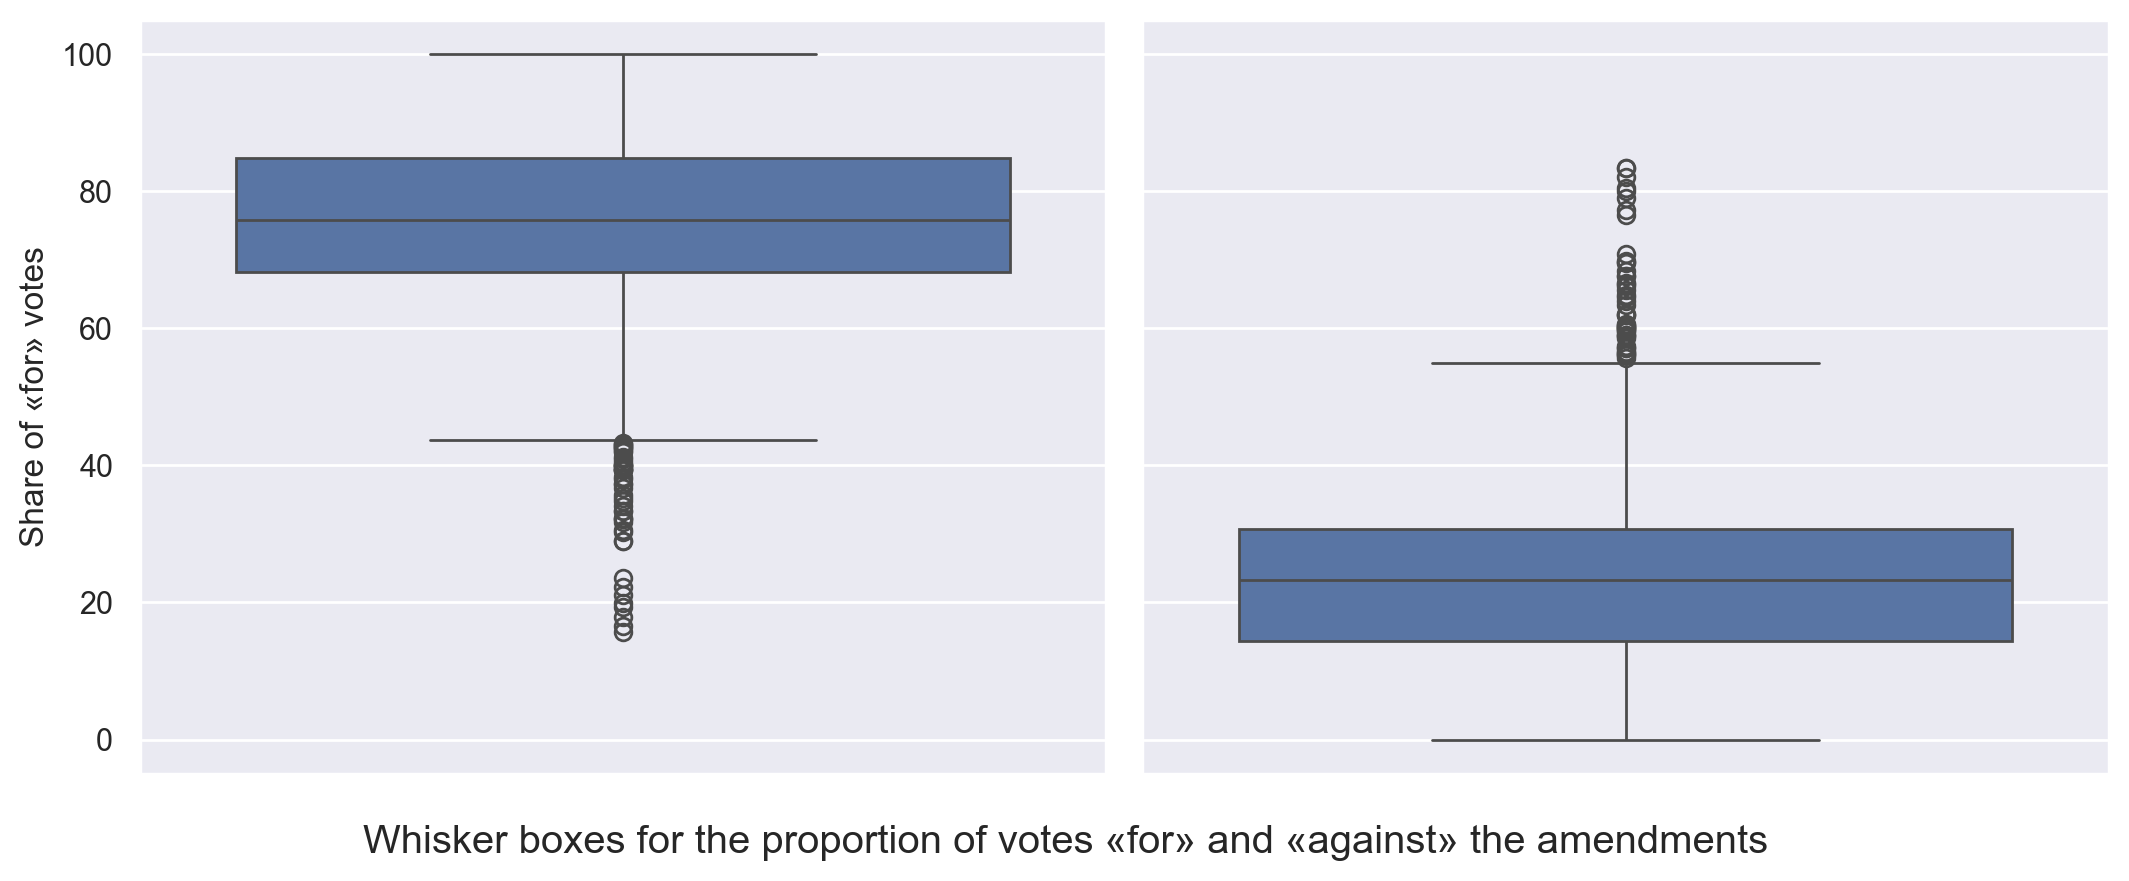

In [13]:
# Source for posting the two graphs: https://predictivehacks.com/decision-boundary-in-python/

fig, axs = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)
sns.boxplot(data=constitution, 
            y='for_votes_percent',
            ax=axs[0])

axs[0].set_ylabel('Share of «for» votes')

sns.boxplot(data=constitution, 
            y='against_votes_percent',
            ax=axs[1])
axs[1].set_ylabel('Share of «against» votes')

fig.suptitle('Whisker boxes for the proportion of votes «for» and «against» the amendments', y=0.035)
fig.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

We see how clearly the two medians are separated within the graphs.

## Presidential elections in Russia in 2004-2018.

Now let us analyze the processed and combined data set on the results of the presidential elections.

In [15]:
# Read the processed data
presidential_data_merged = pd.read_csv('data/data-clean/presidential_data_merged.csv').drop('Unnamed: 0', axis=1)

### Descriptive statistics

Let's look at the descriptive statistics of the data:

In [41]:
presidential_data_merged.describe().T

count          mean  \
voters_number                                 12201.0  34288.172527   
ballots_number_received                       12201.0  32774.502418   
issued_ballots_number_early                   12201.0     63.155643   
issued_ballots_number_voting_day_incide       12201.0  21221.316122   
issued_ballots_number_voting_day_outside      12201.0   1666.066142   
ballots_number_extinguished                   12201.0   9823.762806   
ballots_number_portable_boxes                 12201.0   1728.763052   
ballots_number_stationary_boxes               12201.0  21198.788296   
ballots_number_invalid                        12201.0    257.075650   
ballots_number_valid                          12201.0  22670.475699   
ballots_number_absentee_received               9025.0    692.807313   
ballots_number_absentee_issued                 9025.0    509.346039   
voters_number_voted_on_absentee_ballots        9025.0    396.038449   
number_absentee_ballots_unused                 9025.0    183.448864   
ballots_number_absentee_issued_to_tik_voters   9025.0     41.745263   
ballots_number_lost                           12201.0      0.232030   
ballots_number_not_counted                    12201.0      0.030325   
opposition_number                             12201.0   6338.603557   
opposition_percent                            12201.0     26.262585   
incumbent_number                              12201.0  16174.304729   
incumbent_percent                             12201.0     72.030232   

                                                       std    min       25%  \
voters_number                                 40458.433070   6.00   9908.00   
ballots_number_received                       37409.810224   8.00  10123.00   
issued_ballots_number_early                     473.518776   0.00      0.00   
issued_ballots_number_voting_day_incide       24864.171977   0.00   5921.00   
issued_ballots_number_voting_day_outside       1744.366628   0.00    520.00   
ballots_number_extinguished                   13374.644684   0.00   2006.00   
ballots_number_portable_boxes                  1764.631471   0.00    600.00   
ballots_number_stationary_boxes               24828.321328   0.00   5921.00   
ballots_number_invalid                          365.498540   0.00     50.00   
ballots_number_valid                          25535.209796   3.00   6933.00   
ballots_number_absentee_received                870.294783   0.00    188.00   
ballots_number_absentee_issued                  708.818083   0.00     79.00   
voters_number_voted_on_absentee_ballots         716.049124   0.00     49.00   
number_absentee_ballots_unused                  338.272600   0.00     17.00   
ballots_number_absentee_issued_to_tik_voters    146.108865   0.00      1.00   
ballots_number_lost                               2.623134   0.00      0.00   
ballots_number_not_counted                        0.946728   0.00      0.00   
opposition_number                              8344.385424   0.00   1393.00   
opposition_percent                               11.386437   0.00     19.30   
incumbent_number                              18153.315177   2.00   4893.00   
incumbent_percent                                11.660565  18.33     64.31   

                                                   50%       75%        max  
voters_number                                 19265.00  42336.00  363109.00  
ballots_number_received                       19100.00  40357.00  357450.00  
issued_ballots_number_early                       0.00      0.00   13978.00  
issued_ballots_number_voting_day_incide       12215.00  26596.00  242319.00  
issued_ballots_number_voting_day_outside       1232.00   2250.00   27289.00  
ballots_number_extinguished                    4917.00  11752.00  172053.00  
ballots_number_portable_boxes                  1277.00   2310.00   27289.00  
ballots_number_stationary_boxes               12213.00  26589.00  242195.00  
ballots_number_invalid                      

We see a large gap between the average number of votes for incumbent and opposition candidates (with the latter being an umbrella term in this data).
As with the amendment voting data, the mean is barely different from the median, suggesting that the distribution is probably not skewed.

Let's look at a few abnormal values of the vote share for opposition candidates:

In [22]:
presidential_data_merged[presidential_data_merged['opposition_percent'] > 75]

elections_year                      region commission_name  \
6786     2012-03-04  Территория за пределами РФ       УИК №5049   
6787     2012-03-04  Территория за пределами РФ       УИК №5050   
7104     2012-03-04  Территория за пределами РФ       УИК №5478   

      voters_number  ballots_number_received  issued_ballots_number_early  \
6786            671                     1000                            0   
6787            349                     1500                            0   
7104           3847                     4000                            0   

      issued_ballots_number_voting_day_incide  \
6786                                      671   
6787                                      349   
7104                                     3758   

      issued_ballots_number_voting_day_outside  ballots_number_extinguished  \
6786                                         0                          329   
6787                                         0                         1151   
7104                                        89                          153   

      ballots_number_portable_boxes  ballots_number_stationary_boxes  \
6786                              0                              671   
6787                              0                              349   
7104                             89                             3748   

      ballots_number_invalid  ballots_number_valid  \
6786                      16                   655   
6787                       8                   341   
7104                      85                  3752   

      ballots_number_absentee_received  ballots_number_absentee_issued  \
6786                              10.0                             0.0   
6787                              10.0                             0.0   
7104                              20.0                             1.0   

      voters_number_voted_on_absentee_ballots  number_absentee_ballots_unused  \
6786                                     16.0                            10.0   
6787                                      8.0                            10.0   
7104                                    272.0                            19.0   

      ballots_number_absentee_issued_to_tik_voters  ballots_number_lost  \
6786                                           0.0                    0   
6787                                           0.0                    0   
7104                                           0.0                    0   

      ballots_number_not_counted  \
6786                           0   
6787                           0   
7104                           0   

                                                   link  opposition_number  \
6786  http://www.vybory.izbirkom.ru/region/izbirkom?...                532   
6787  http://www.vybory.izbirkom.ru/region/izbirkom?...                270   
7104  http://www.vybory.izbirkom.ru/region/izbirkom?...               2886   

      opposition_percent  incumbent_number  incumbent_percent  
6786               79.29               123              18.33  
6787               77.36                71              20.34  
7104               75.22               866              22.57

We see that all three commissions, in which the result of the share of votes for opposition candidates exceeds 75%, are located abroad of the Russian Federation, and the elections were held in 2012. This may be due to the increased protest activity after the State Duma elections in 2011-2012. However, specifically in this case I am very confused by the values in the `ballots_number_received` column, which exceed the number of voters in these PECs and look strange. Although the number of votes counted does not correlate with this field and is consistent with the number of voters.

### Visualization

Let's take a deeper look at the presidential election data.

First, let us look at the relationship between the number of votes and the share of votes received by opposition candidates. 
Scientific literature often hypothesizes that such a relationship may be significant and positive due to the peculiarities of mobilization of the electorate voting for the representatives of the party in power.

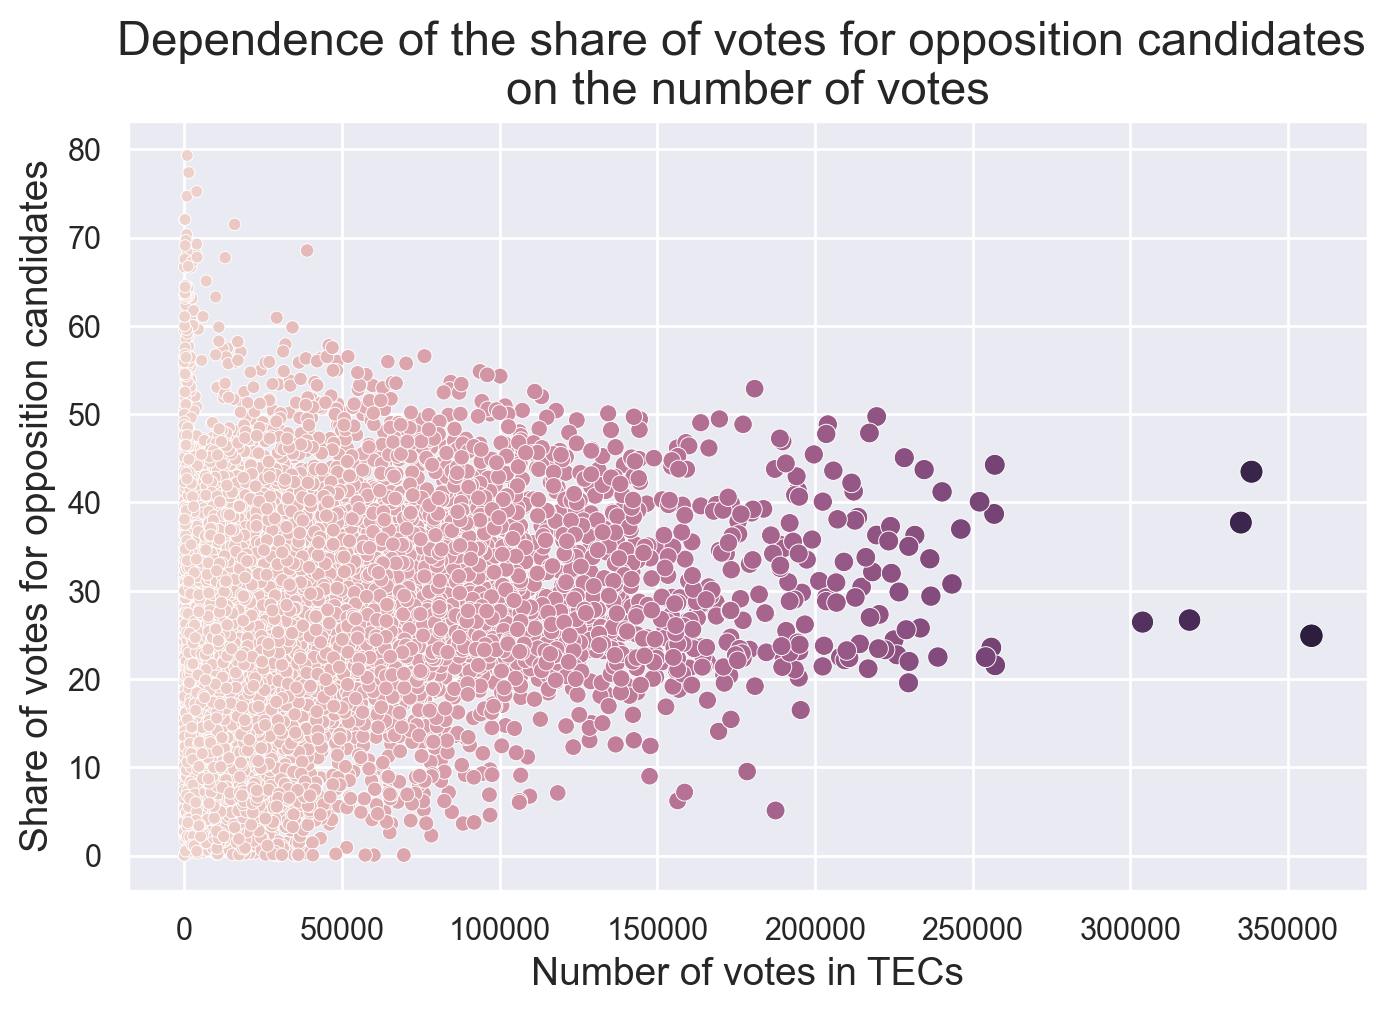

In [17]:
plt.figure(figsize=(8, 5))

sns.scatterplot(data=presidential_data_merged, 
                x='ballots_number_received', 
                y='opposition_percent', 
                hue='ballots_number_received',
                size='ballots_number_received',  # for clarity, let the size of the dots 
                legend=False)                    # will depend on the number of votes

plt.title('Dependence of the share of votes for opposition candidates \non the number of votes', fontsize=17)
plt.xlabel('Number of votes in TECs', fontsize=14)
plt.ylabel('Share of votes for opposition candidates', fontsize=14)
plt.show()

It seems that a positive relationship is indeed observed. Let's add a regression line:

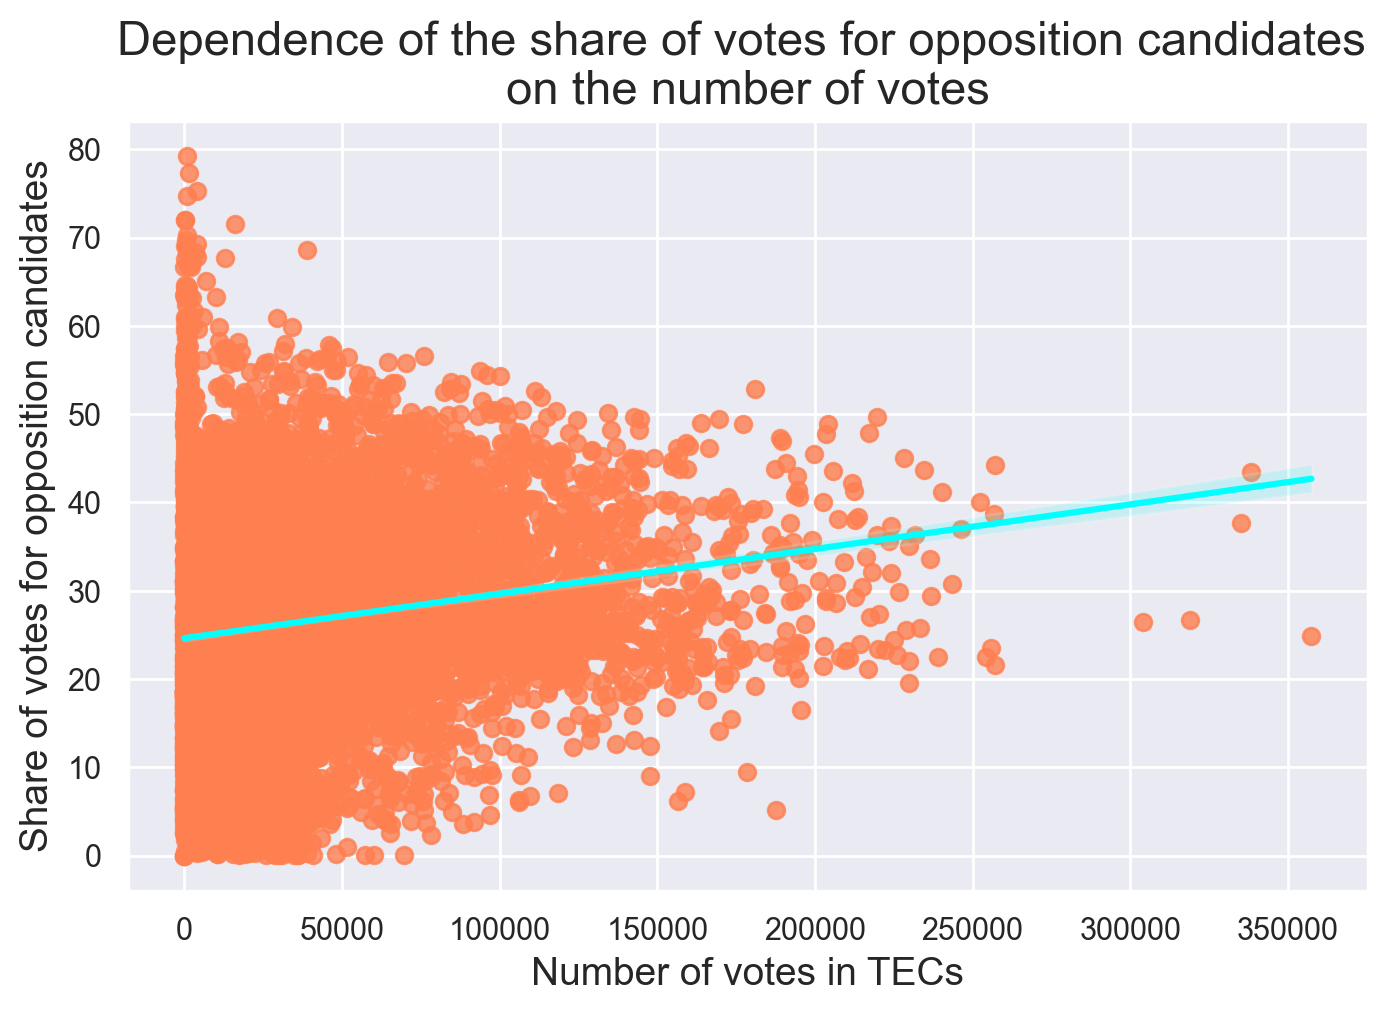

In [18]:
# Plot documentation: https://seaborn.pydata.org/generated/seaborn.regplot.html

plt.figure(figsize=(8, 5))
sns.regplot(x='ballots_number_received', 
            y='opposition_percent', 
            data=presidential_data_merged,
            n_boot=1000,  # number of bootstrapped samples for CI construction 
            ci=95,        # 95% CI
            scatter_kws={"color": "coral"}, line_kws={"color": "cyan"})

plt.title('Dependence of the share of votes for opposition candidates \non the number of votes', fontsize=17)
plt.xlabel('Number of votes in TECs', fontsize=14)
plt.ylabel('Share of votes for opposition candidates', fontsize=14)
plt.show()

We see a positive and average in strength correlation between the number of votes and the share of votes for opposition candidates.

Let's try to make a rating of protest regions, in which the opposition, on average, gets higher results during the period under consideration.
For this purpose, I will additionally calculate the average share of such votes in order to set the correct filtering on the graph.

In [20]:
# I will pass the raw data to seaborn, but to make the graph look better
# the order in which to display the data must be passed to seaborn

opposition_order = presidential_data_merged.groupby('region').agg({"opposition_percent": "mean"}).reset_index()
opposition_order = opposition_order.sort_values('opposition_percent', ascending=False)['region']

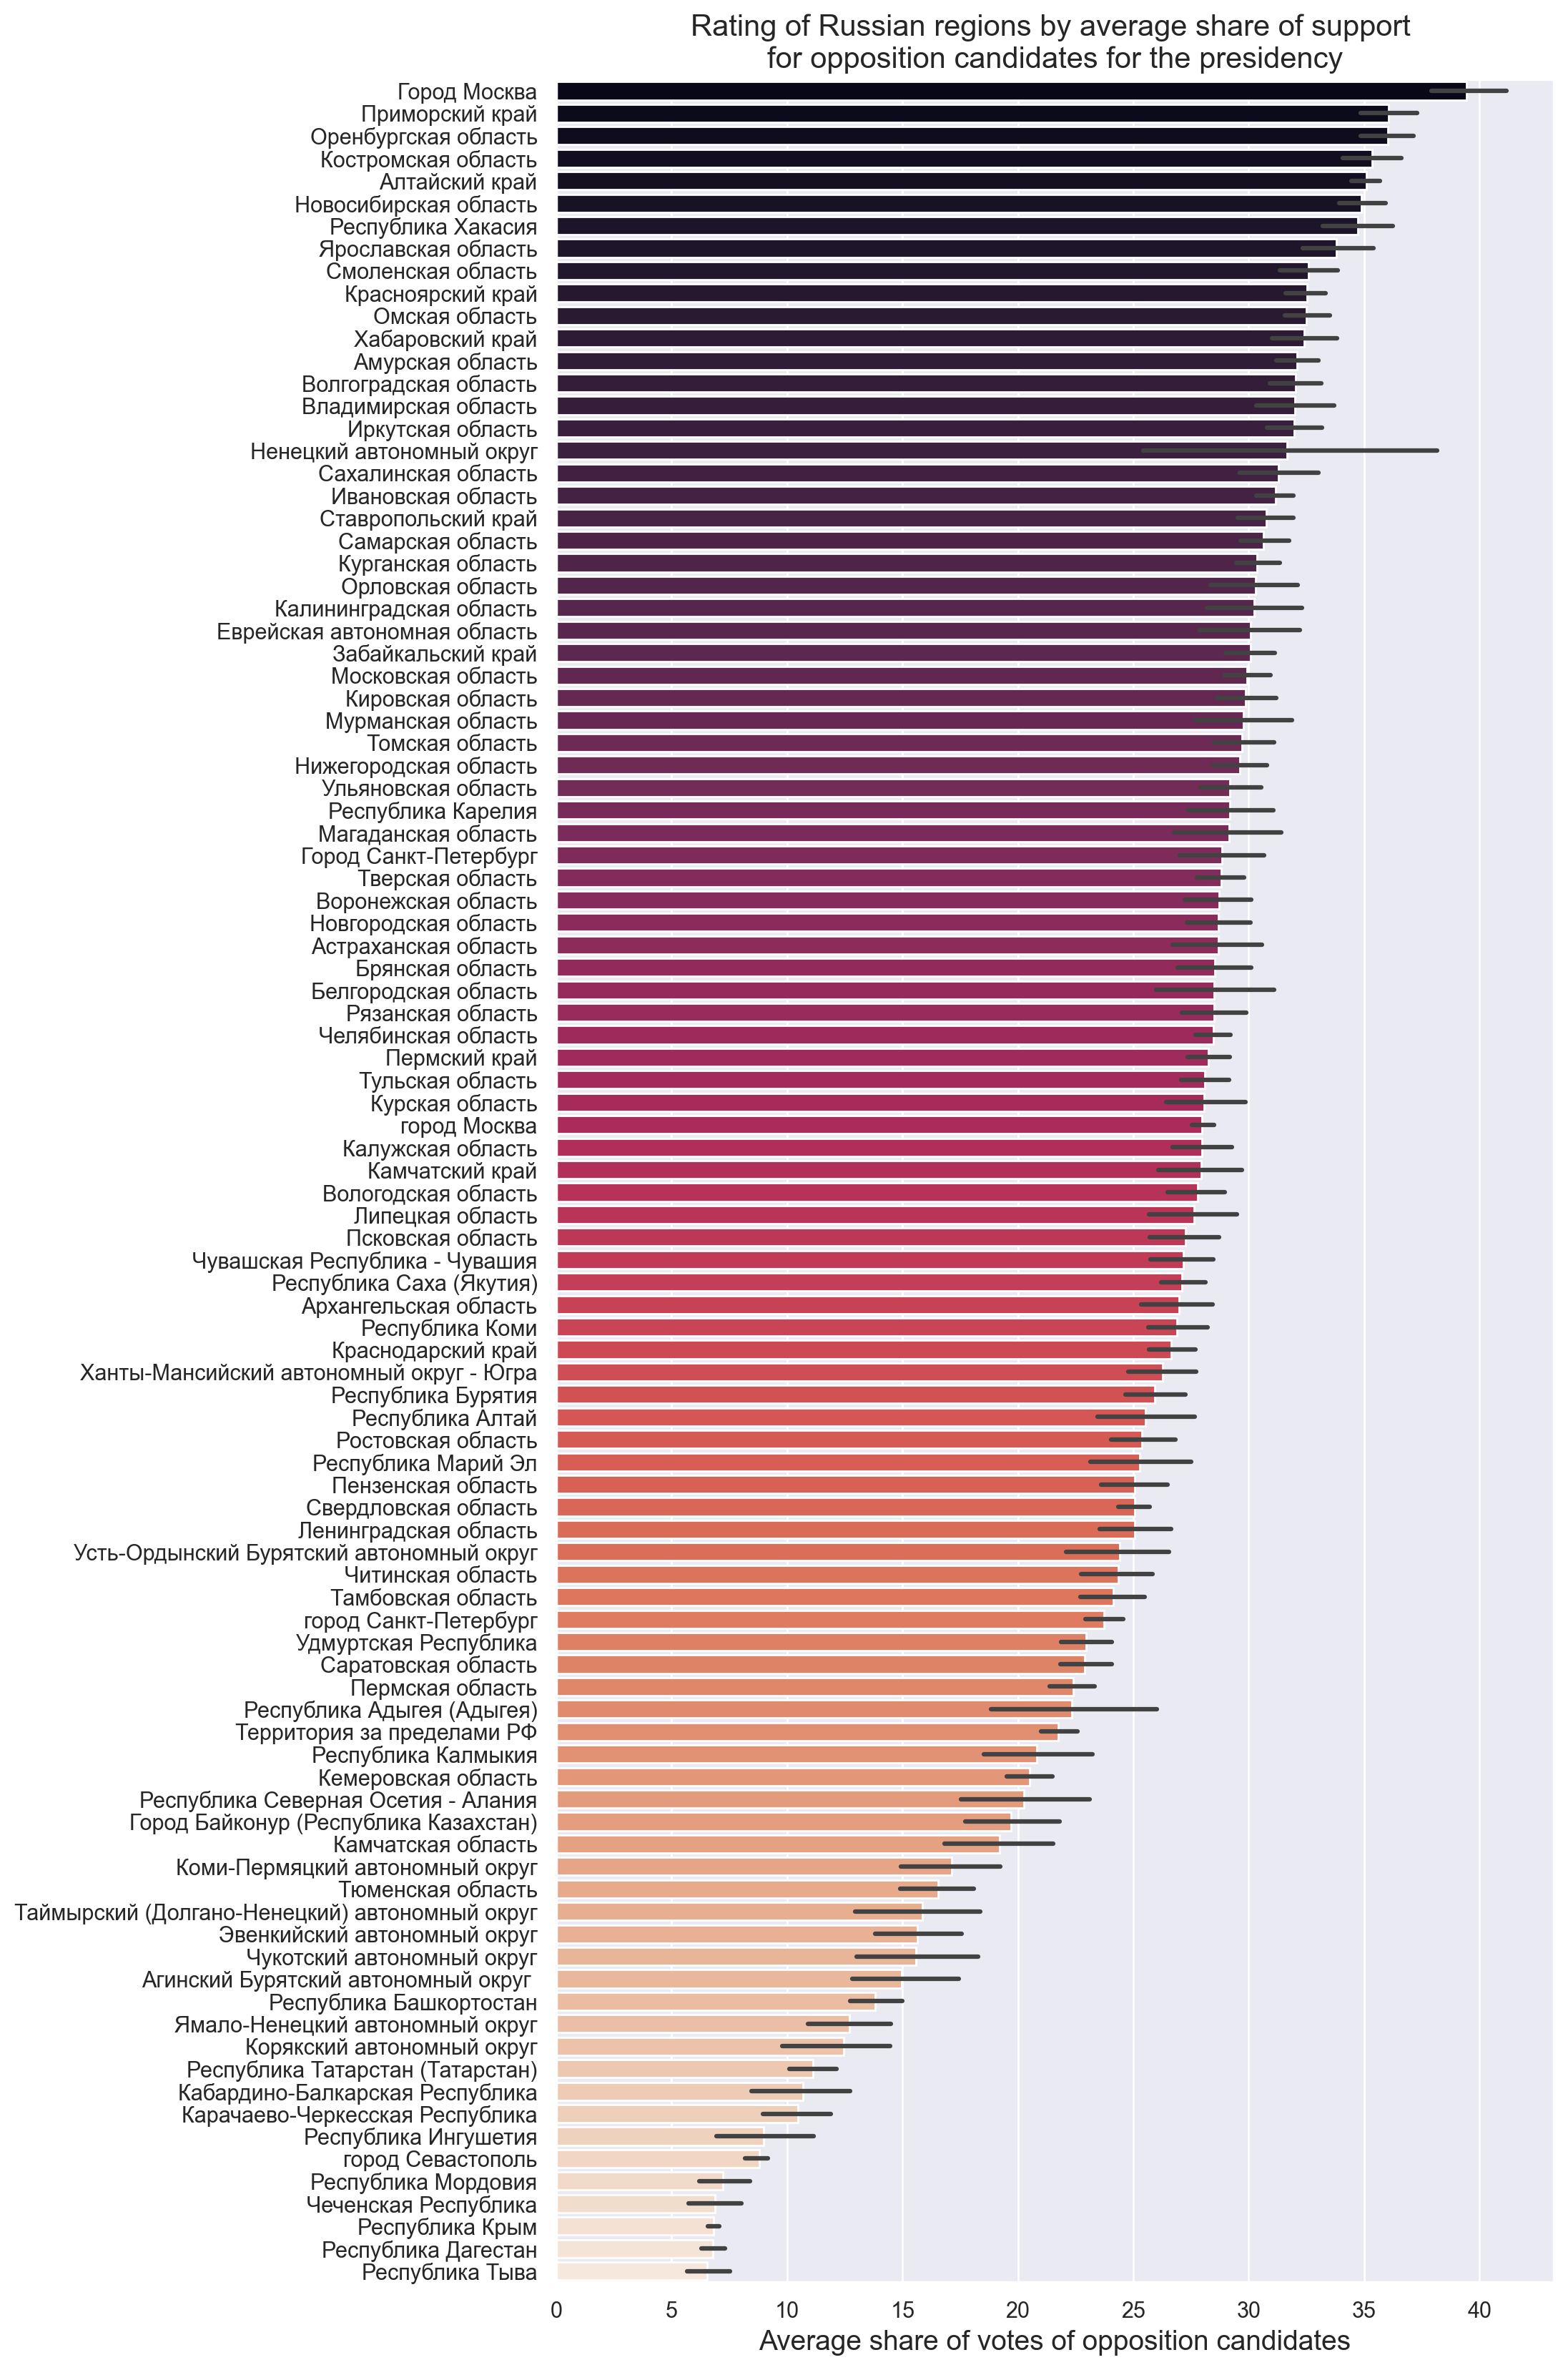

In [21]:
plt.figure(figsize=(9, 20))
sns.barplot(data=presidential_data_merged, 
            x='opposition_percent', 
            y='region', 
            hue='region', 
            palette='rocket',
            order=opposition_order,
            hue_order=opposition_order,
            legend=False)

plt.title('Rating of Russian regions by average share of support \nfor opposition candidates for the presidency', fontsize=15)
plt.xlabel('Average share of votes of opposition candidates', fontsize=14)
plt.ylabel('', fontsize=14)
plt.show()

We can notice some (negative) correlation between the rating of regions in terms of support for constitutional amendments and the average support for opposition candidates for the presidency in this graph.

Now let's look at the «box-and-whiskers plot» based on the support of incumbents and opposition candidates:

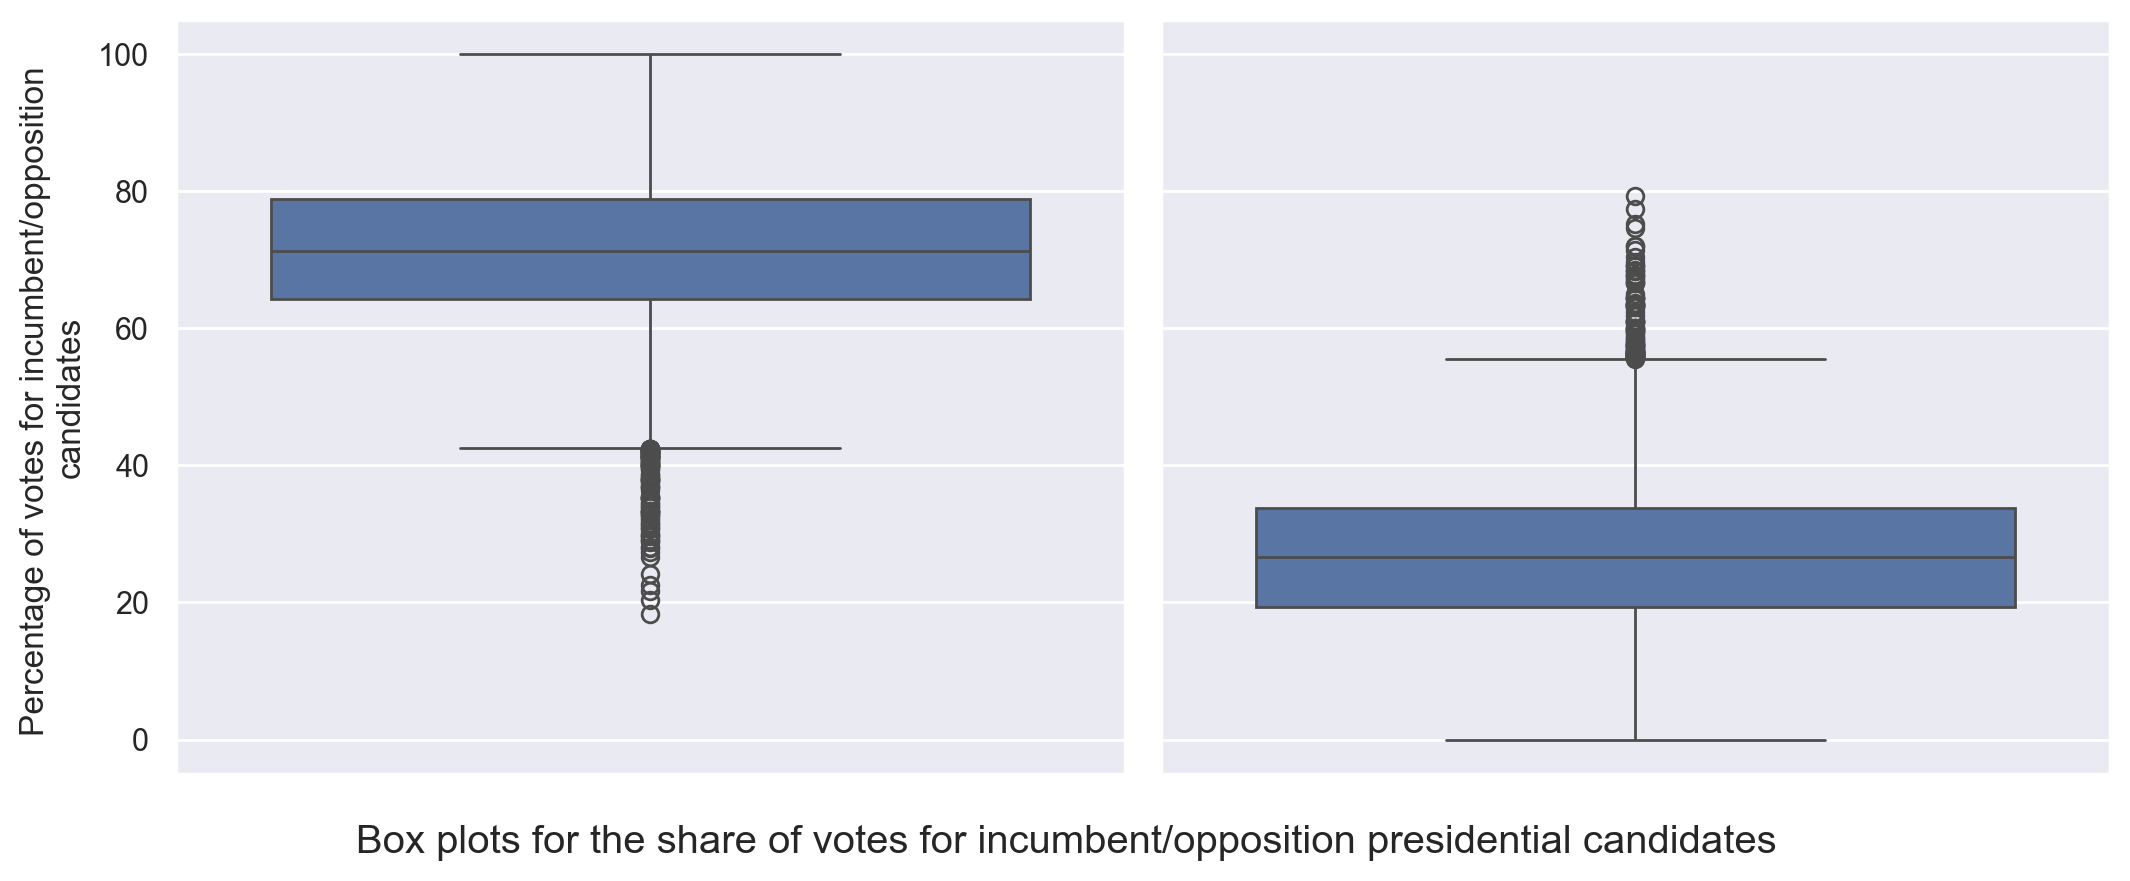

In [24]:
# Source for posting the two graphs: https://predictivehacks.com/decision-boundary-in-python/

fig, axs = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)
sns.boxplot(data=presidential_data_merged, 
            y='incumbent_percent',
            ax=axs[0])

axs[0].set_ylabel('Percentage of votes for incumbent/opposition \ncandidates')

sns.boxplot(data=presidential_data_merged, 
            y='opposition_percent',
            ax=axs[1])

fig.suptitle('Box plots for the share of votes for incumbent/opposition presidential candidates', y=0.035)
fig.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

As in the example with voting on constitutional amendments, the graphs overlap very slightly.

Next, we will construct an interactive visualization of the relationship between the number of votes and support for opposition candidates, which was discussed above. However, I will additionally add the number of spoiled ballots as a parameter determining the size of the points, as well as histograms reflecting the distributions of the variables:

In [26]:
# Docs: https://plotly.com/python/line-and-scatter/
fig = px.scatter(presidential_data_merged, 
                 x="ballots_number_received", 
                 y="opposition_percent", 
                 size='ballots_number_invalid', 
                 hover_data=['region', 'commission_name', 'elections_year'],
                 marginal_x="histogram", 
                 marginal_y="histogram",
                 width = 1200, 
                 height = 600)

fig.update_layout(title='Relationship between number of votes and share of votes for opposition candidates')
fig.update_layout(xaxis_title='Number of votes', yaxis_title='Share of votes for opposition candidates')
fig.show()

You can see that the share of votes for opposition candidates has a distribution close to normal (with a slight downward skew), and the distribution of the number of votes would have a perfect lognormal distribution, skewed to the left, if it didn't have a large peak with a small number of votes (up to 2,000). If you look at the values they take, you can see a large number of rather atypically rounded data: 800, 1000, 1200, etc.

Let's modify the graph a bit: let's add a regression line and take as two variables Number of votes inside the polling station (i.e. not at home) and share of votes for the incumbent. The number of votes in portable polling booths will be the parameter determining the size of the points.

In [27]:
# Docs: https://plotly.com/python/line-and-scatter/
fig = px.scatter(presidential_data_merged, 
                 x="ballots_number_stationary_boxes", 
                 y="incumbent_percent", 
                 size='ballots_number_portable_boxes', 
                 hover_data=['region', 'commission_name'],
                 marginal_x="histogram", 
                 marginal_y="histogram",
                 trendline="ols",
                 width = 1200, 
                 height = 600)

fig.update_layout(title='Relationship between the number of votes in fixed booths and the proportion of votes for incumbents')
fig.update_layout(xaxis_title='Number of votes in fixed booths', yaxis_title='Percentage of votes in favor of incumbent')
fig.show()

We see a negative correlation, which may be due to both the distribution among the population, which is more inclined to vote at home or elsewhere (e.g. military service place) rather than at the polling station, and the potential for fraud in this type of voting.

Finally, I would like to construct an interactive graph showing the average support for incumbents and opposition candidates over time, since the data I collected has 4 time periods. To do this, I aggregate the data:

In [29]:
# Process the sum of votes among the TECs and their number to get the average support values
presidential_data_grouped = presidential_data_merged.groupby('elections_year').agg(
    {'opposition_number': 'sum', 'opposition_percent': 'count',
     'incumbent_number': 'sum', 'incumbent_percent': 'count'}).reset_index()

# Average support values
presidential_data_grouped['opposition_mean'] = presidential_data_grouped['opposition_number'] / presidential_data_grouped['opposition_percent']
presidential_data_grouped['incumbent_mean'] = presidential_data_grouped['incumbent_number'] / presidential_data_grouped['incumbent_percent']

In [30]:
# Take only needed cols
presidential_data_grouped = presidential_data_grouped[['elections_year', 'opposition_mean', 'incumbent_mean']]
presidential_data_grouped

elections_year  opposition_mean  incumbent_mean
0     2004-03-14      5214.834411    15367.638649
1     2008-03-02      6812.469152    16880.048843
2     2012-03-04      8073.793225    14574.009268
3     2018-03-18      5149.842569    17766.498426

In [31]:
# Button code source: https://community.plotly.com/t/trying-to-display-all-y-axis-names-in-scatter-chart-even-without-data/72079

fig = go.Figure()

# Incumbent support
color = 'brown'
fig.add_trace(go.Scatter(
    x=presidential_data_grouped['elections_year'],
    y=presidential_data_grouped['incumbent_mean'],
    text=presidential_data_grouped['elections_year'],
    line=dict(color=color),
    name='Average number of votes for incumbent'
))

# Support for opposition candidates
color = 'cyan'
fig.add_trace(go.Scatter(
    x=presidential_data_grouped['elections_year'],
    y=presidential_data_grouped['opposition_mean'],
    text=presidential_data_grouped['elections_year'],
    line=dict(color=color),
    name='Average number of votes for the opposition (all)'
))

# Time filter buttons
fig.update_layout(
    dragmode="pan",
    hovermode="x",
    legend=dict(traceorder="reversed"),
    height=600,
    template="plotly_white",
    margin=dict(
        t=100,
        b=100),
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1d', step='day', stepmode='backward'),
                dict(count=7, label='1w', step='day', stepmode='backward'),
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible=True),
        type='date'
    )
)

fig.update_layout(
    title = {
        "text": "Average number of votes for incumbent/opposition candidates (all)",
        "x": 0.5
    })

fig.show()

We see that the average support of incumbents fell only during the presidential elections in 2012, which, as noted above, can be associated with the growth of protest activity during this period.

### Combining data on amendment voting and presidential elections

As a generalization of the two data sets, I would like to consider voting on constitutional amendments as an extension of the analogy with voting for incumbent vs opposition. The reason for this is both the very essence of the proposed changes and the public positioning of this vote by the representatives of the authorities: namely as a referendum of their support.

For this purpose, I will calculate aggregate statistics on the basis of the first data set and combine it with the second one:

In [33]:
constitution_grouped = constitution.groupby('vote_date').agg(
    {'for_votes_number': 'sum', 'for_votes_percent': 'count',
     'against_votes_number': 'sum', 'against_votes_percent': 'count'}).reset_index()

constitution_grouped['incumbent_mean'] = constitution_grouped['for_votes_number'] / constitution_grouped['for_votes_percent']
constitution_grouped['opposition_mean'] = constitution_grouped['against_votes_number'] / constitution_grouped['against_votes_percent']

constitution_grouped = constitution_grouped.rename({'vote_date': 'elections_year'}, axis=1)
# Take a subsample
constitution_grouped = constitution_grouped[['elections_year', 'incumbent_mean', 'opposition_mean']]

In [34]:
# Concatenate data
concated_data = pd.concat([presidential_data_grouped, constitution_grouped])

Now let me expand on the graph I plotted in the previous step:

In [35]:
# Button code source: https://community.plotly.com/t/trying-to-display-all-y-axis-names-in-scatter-chart-even-without-data/72079

fig = go.Figure()

color = 'brown'
fig.add_trace(go.Scatter(
    x=concated_data['elections_year'],
    y=concated_data['incumbent_mean'],
    text=concated_data['elections_year'],
    line=dict(color=color),
    name='Average number of votes for incumbent'
))

color = 'cyan'
fig.add_trace(go.Scatter(
    x=concated_data['elections_year'],
    y=concated_data['opposition_mean'],
    text=concated_data['elections_year'],
    line=dict(color=color),
    name='Average number of votes for the opposition (all)'
))

# Time filter buttons
fig.update_layout(
    dragmode="pan",
    hovermode="x",
    legend=dict(traceorder="reversed"),
    height=600,
    template="plotly_white",
    margin=dict(
        t=100,
        b=100),
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1d', step='day', stepmode='backward'),
                dict(count=7, label='1w', step='day', stepmode='backward'),
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible=True),
        type='date'
    )
)

fig.update_layout(
    title = {
        "text": "Average number of votes for incumbent/opposition candidates (all)",
        "x": 0.5
    })

fig.show()

We see that by treating the vote to amend the Constitution as a vote to support the incumbent, we can argue that his support increased by 2020.